## EDA
Nessa etapa iremos realizar a análise exploratória da base modelo. Para a EDA em questões tentar preencher os seguintes checks:
1. Taxa de Eventos por safra
2. Quantidade de nulos por variáveis
3. Entender qual variável pode ser tratada como categórica e qual pode ser tratada como numérica
4. Quais variáveis são muito correlacionadas em si
5. Análise do Target por variávei
6. Distribuição das Variáveis 

Por se tratar de um modelo de Score de Crédito, iremos tratar o target como um indicador de inadimplência.

In [15]:
# Importando as Bibliotecas que usaremos na Análise Exploratória
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from galeritas import bar_plot_with_population_proportion

from utils import *

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [16]:
df = pd.read_csv('../../data/raw/base_modelo.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10738 non-null  int64  
 1   safra   10738 non-null  int64  
 2   y       10738 non-null  int64  
 3   VAR_1   10322 non-null  float64
 4   VAR_2   10322 non-null  float64
 5   VAR_3   10322 non-null  float64
 6   VAR_4   10322 non-null  float64
 7   VAR_5   6678 non-null   float64
 8   VAR_6   10647 non-null  float64
 9   VAR_7   6106 non-null   float64
 10  VAR_8   5905 non-null   float64
 11  VAR_9   10738 non-null  float64
 12  VAR_10  5173 non-null   float64
 13  VAR_11  5754 non-null   float64
 14  VAR_12  3541 non-null   float64
 15  VAR_13  5520 non-null   float64
 16  VAR_14  5197 non-null   float64
 17  VAR_15  5684 non-null   float64
 18  VAR_16  3631 non-null   float64
 19  VAR_17  6237 non-null   float64
 20  VAR_18  3615 non-null   float64
 21  VAR_19  10677 non-null  float64
 22

## 1. Verificando Estabilidade da Variável Target

In [18]:
# Olhando as colunas do Dataset
df.sample(3)

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
2728,2729,201407,0,3.0,0.0,0.0,0.0,172.05,3356.0,35.18,54.31,500.0,NaN,107.20,NaN,NaN,NaN,41.47,114.0,NaN,126.0,48.0,10,3759.0,63.0,NaN,446.20,3.0,NaN,226.0,4.0,NaN,500.0,5.0,0.133833,15.0,160.95,447.60,NaN,NaN,175.93,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,290.29,500.0,500.0,NaN,NaN,41,443.0,NaN,-0.133344,NaN,1254.0,NaN,1,332.88,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
295,296,201406,1,99.0,1.0,1.0,1.0,86.32,396.0,69.49,39.97,2600.0,NaN,191.76,NaN,NaN,357.0,95.84,NaN,890.0,NaN,0.0,12,NaN,0.0,NaN,389.02,0.0,7.0,NaN,0.0,2.0,5200.0,0.0,0.090634,0.0,104.94,1454.51,NaN,2.0,694.90,NaN,0.0,0.0,2.0,NaN,0.0,NaN,2.0,NaN,2.0,0.0,187.54,357.0,483.81,3490.0,3490.0,187.54,187.54,63,387.0,NaN,0.412256,NaN,NaN,187.54,1,183.82,NaN,-27.0,2.0,NaN,NaN,0.0,58.0,0.0,0.0,375.08,NaN,NaN,0.0
9250,9251,201405,0,20.0,0.0,0.0,0.0,NaN,1153.0,NaN,NaN,1500.0,376.0,21.59,144.0,67.35,590.0,42.38,NaN,1000.0,NaN,0.0,10,NaN,0.0,91.94,NaN,1.0,228.0,53.0,2.0,0.0,2500.0,0.0,0.133833,0.0,NaN,107.96,0.0,-1.0,NaN,334.0,11.0,NaN,1.0,12.0,12.0,336.81,1.0,NaN,NaN,NaN,NaN,590.0,211.92,1500.0,6000.0,235.42,NaN,59,NaN,404.9,0.357324,0.0,NaN,235.42,0,1092.97,14.0,-9.0,NaN,379.83,4.71,0.0,150.0,0.0,0.0,NaN,382.68,0.0,0.0


In [19]:
# Criando uma variável de mês-ano
df['mes_ano'] = df['safra'].astype(str).str[0:4] + '-' + df['safra'].astype(str).str[4:]
df.mes_ano.nunique()

12

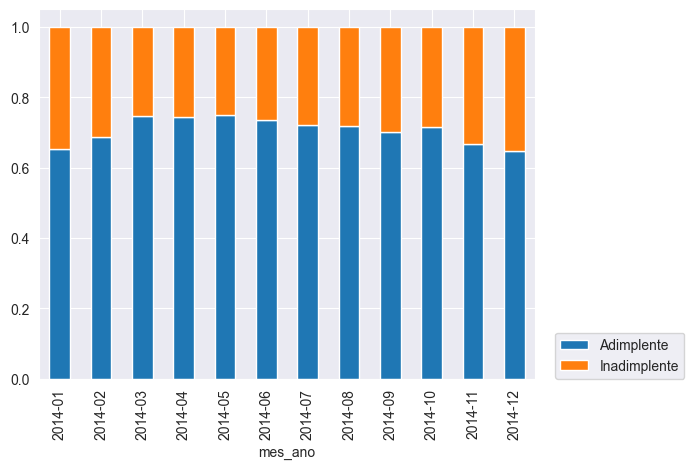

In [20]:
# Plotando um gráfico de barras para medir a taxa de eventos por safra e verificar se o target tem alguma mudança muito brusca em algum mês
df.groupby('mes_ano').y.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.legend(['Adimplente', 'Inadimplente'], loc=(1.04, 0))

In [21]:
# Verificando a proporção dos contratos por safra
df.mes_ano.value_counts(normalize=True).sort_index().cumsum()

mes_ano
2014-01    0.079531
2014-02    0.163159
2014-03    0.244459
2014-04    0.333395
2014-05    0.423915
2014-06    0.507916
2014-07    0.598063
2014-08    0.682995
2014-09    0.764668
2014-10    0.851555
2014-11    0.926802
2014-12    1.000000
Name: proportion, dtype: float64

### Observações
* Iremos modelar para a safra de 2014. Apesar de ter algumas flutuações, o target parece estável no decorrer do ano, sendo assim há a possibilidade de utilizarmos todas as safras presentes e optar por fazer um Split Temporal na base treino e teste.
* Uma proposta para o split temporal será utilizar de Jan/14 até Sep/14 como treino e o último quarter do ano como teste

## 2. Quantidade de Nulos por variável

In [22]:
# Checando a porcentagem de valores nulos por coluna
missing_perc = df.isnull().mean().sort_values(ascending=False)
missing_perc

VAR_62     0.780127
VAR_70     0.769138
VAR_61     0.713168
VAR_49     0.679456
VAR_36     0.676849
             ...   
VAR_20     0.000000
VAR_60     0.000000
VAR_57     0.000000
VAR_64     0.000000
mes_ano    0.000000
Length: 82, dtype: float64

In [23]:
# Há muitas colunas com valores nulos muito altos, iremos verificar a quantidade de colunas com mais de 20% de valores nulos
cols_exclude = missing_perc[missing_perc > 0.2].index
cols_exclude, cols_exclude.nunique()

(Index(['VAR_62', 'VAR_70', 'VAR_61', 'VAR_49', 'VAR_36', 'VAR_63', 'VAR_12',
        'VAR_43', 'VAR_18', 'VAR_21', 'VAR_16', 'VAR_47', 'VAR_75', 'VAR_41',
        'VAR_56', 'VAR_55', 'VAR_50', 'VAR_68', 'VAR_48', 'VAR_67', 'VAR_37',
        'VAR_29', 'VAR_27', 'VAR_31', 'VAR_42', 'VAR_46', 'VAR_10', 'VAR_69',
        'VAR_77', 'VAR_66', 'VAR_23', 'VAR_51', 'VAR_26', 'VAR_14', 'VAR_74',
        'VAR_73', 'VAR_71', 'VAR_78', 'VAR_45', 'VAR_39', 'VAR_13', 'VAR_52',
        'VAR_15', 'VAR_11', 'VAR_35', 'VAR_8', 'VAR_34', 'VAR_38', 'VAR_7',
        'VAR_59', 'VAR_76', 'VAR_17', 'VAR_24', 'VAR_5', 'VAR_58', 'VAR_65'],
       dtype='object'),
 56)

In [24]:
# Das 78 variáveis, 56 possuem mais de 20% de valores nulos. Essas variáveis tornam difícies de imputar algum valor para ter um bom treinamento do modelo
# Vamos filtrar o dataset para ter apenas features com menos de 20% de valores nulos

df_filter = df.drop(columns=cols_exclude)

## 3. Checando quais Features podem ser numéricas discretas 

In [25]:
# Criando uma variável com a quantidade de 
nunique_cols = df_filter.drop(columns=['id', 'safra', 'y', 'mes_ano']).nunique()

In [26]:
nunique_cols

VAR_1      196
VAR_2       16
VAR_3       12
VAR_4       14
VAR_6     3473
VAR_9     2023
VAR_19     111
VAR_20      10
VAR_22     120
VAR_25      13
VAR_28      13
VAR_30    2693
VAR_32       9
VAR_33      49
VAR_40      13
VAR_44      13
VAR_53    3244
VAR_54    2750
VAR_57      61
VAR_60      20
VAR_64       2
VAR_72    1231
dtype: int64

In [27]:
# Para fins de modelagem iremos considerar como numéricas discretas apenas features com até 20 valores únicos
categorical_cols = nunique_cols[nunique_cols <= 20].index
numerical_cols = nunique_cols[nunique_cols > 20].index

In [28]:
categorical_cols

Index(['VAR_2', 'VAR_3', 'VAR_4', 'VAR_20', 'VAR_25', 'VAR_28', 'VAR_32',
       'VAR_40', 'VAR_44', 'VAR_60', 'VAR_64'],
      dtype='object')

In [29]:
# Iremos utilizar o print para verificar como são as categorias dessas variáveis
for cat in categorical_cols:
    print(f'Categorias da coluna {cat}', df_filter[cat].unique())

Categorias da coluna VAR_2 [ 0.  2. nan  1.  6.  3.  5.  4.  7. 13. 10. 14.  8.  9. 11. 17. 12.]
Categorias da coluna VAR_3 [ 0.  2.  4. nan  1.  5.  7.  3.  6.  8.  9. 11. 10.]
Categorias da coluna VAR_4 [ 0.  1.  2. nan  5.  4.  3.  9.  7.  6.  8. 10. 11. 12. 13.]
Categorias da coluna VAR_20 [ 8 12 10  5  9  6  7  4  3 11]
Categorias da coluna VAR_25 [12.  9.  3.  0. 11.  6.  7.  1.  5. 10.  4. nan  2.  8.]
Categorias da coluna VAR_28 [12. 10.  5.  0. 11.  4.  7.  2.  6.  9. nan  8.  3.  1.]
Categorias da coluna VAR_32 [ 0.13383291  0.09063414  0.04670934  0.05719819  0.02001942 -0.10340493
 -0.03861383 -0.15102362 -0.0115736 ]
Categorias da coluna VAR_40 [ 9.  5.  4.  0.  3. 12. 11.  8. 10.  6.  2.  1. nan  7.]
Categorias da coluna VAR_44 [11.  9. 12.  6.  0.  4. 10.  3.  5.  2.  1. nan  8.  7.]
Categorias da coluna VAR_60 [-0.03047812  0.35732397 -0.41178673  0.72163002 -0.23173537 -0.35410759
 -0.30845334  0.07992642  0.15630109 -0.13334375 -0.07375648  0.53487812
  0.21938008  0.

In [30]:
# Vamos tirar da lista de variáveis categóricas as colunas VAR_32 e VAR_60
# Vamos tratar essas features como categóricas para a EDA. Isso irá simplificar análise dessas features futuramente
df_filter[categorical_cols] = df_filter[categorical_cols].astype(object)

### Observações
* As maioria das variáveis que são numéricas discretas e que consideramos como categóricas possuem valores muito bem definidos. Salvo algumas exceções como a VAR_32 e a VAR_60. 
* Importante ressaltar que mesmo com valores fora do comum para as variáveis discretas, elas parecem ser coeficientes ou alguma coluna relacionada ao peso

## 4. Checando Quais variáveis podem ter uma correlação alta entre si

### 4.1. Correlação - Features Numéricas

<Axes: >

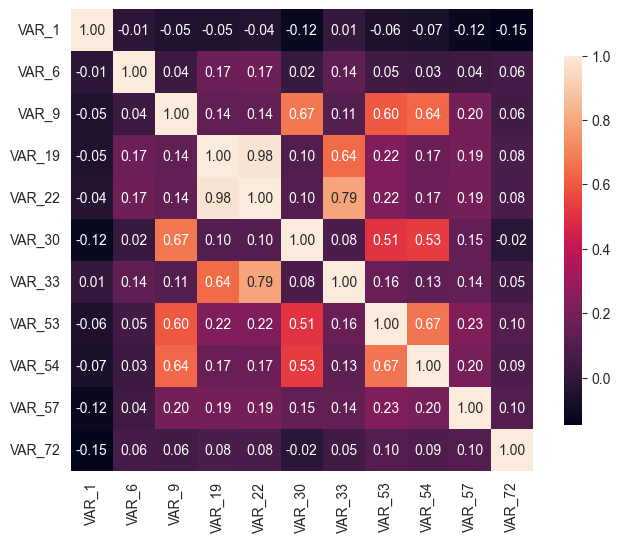

In [31]:
# Vamos construir um gráfico de mapa de calor para identificar features numéricas que possam ser muito relacionadas entre si
plt.figure(figsize=(8, 6))

sns.heatmap(df_filter[numerical_cols].corr(),annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})


### 4.2 Correlação - Features Categóricas

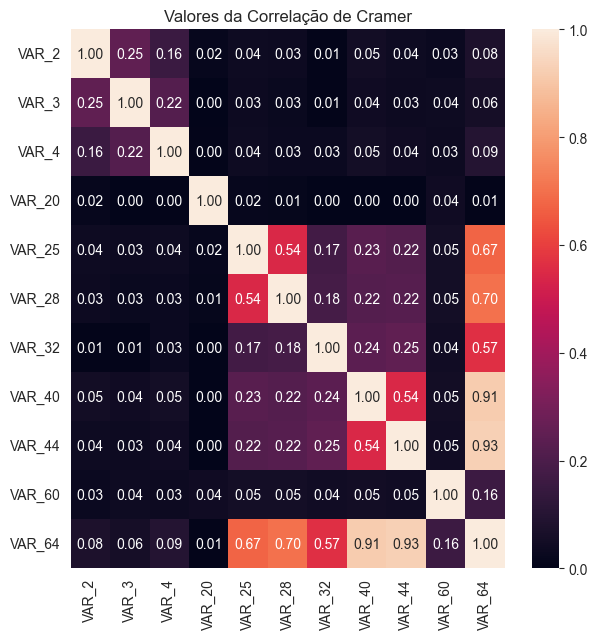

In [32]:
# Iremos testar o Cramer's V para ver a relação entre as variáveis categóricas
plot_cramer(df_filter[categorical_cols])

### Observações
* Variáveis Numéricas:
    * As features VAR_9, VAR_30, VAR_53 e VAR_54 possuem uma grande correlação entre si;
    * As features VAR_19, VAR_22 e VAR_33 possuem uma grande correlação entre si.

* Variáveis Categóricas/Discretas:
    * Apesar de não terem uma grande correlação entre si, a VAR_64 possui uma forte correlação com as features VAR_25, VAR_28, VAR_32, VAR_40 e VAR_44;
    * As features VAR_25 e VAR_28 tem uma forte correlação;
    * As variáveis VAR_40 e VAR_44 possuem uma forte correlação.

## 5. Análise com base no target
O foco dessa etapa é categorizar as variáveis numéricas assim analisar a média do variável target por faixa. O mesmo processo será feito com as variáveis discretas, porém sem a necessidade de criar faixas. Por ser um modelo de Score de Crédito, tentaremos buscar variáveis que tenham uma boa diferença da média do target entre as faixas/categorias. Esse comportamento será importante para a criação de um bom modelo de Crédito interpretável e fácil de explicar para os stakeholders.

Para realizar essa etapa iremos utilizar a função bar_plot_with_population_proportion da biblioteca galeritas, uma lib open source. Essa função irá fazer a proporção de uma certa categoria e plotar gráficos de barras com a média de uma variável alvo. Esse gráfico nos ajudará não só identificar quais faixas/categorias são mais ou menos arriscadas, mas também encontrar o tamanho da população dessas faixas/categorias.

### 5.1 Análise com o Target - Features Numéricas

Proporção de Nulos de VAR_1: 0.0387409200968523
Proporção de Nulos de VAR_6: 0.00847457627118644
Proporção de Nulos de VAR_9: 0.0
Proporção de Nulos de VAR_19: 0.005680759918048054
Proporção de Nulos de VAR_22: 0.005680759918048054
Proporção de Nulos de VAR_30: 0.004470106165021419
Proporção de Nulos de VAR_33: 0.005680759918048054
Proporção de Nulos de VAR_53: 0.16381076550568077
Proporção de Nulos de VAR_54: 0.11873719500838145
Proporção de Nulos de VAR_57: 0.0
Proporção de Nulos de VAR_72: 0.00847457627118644


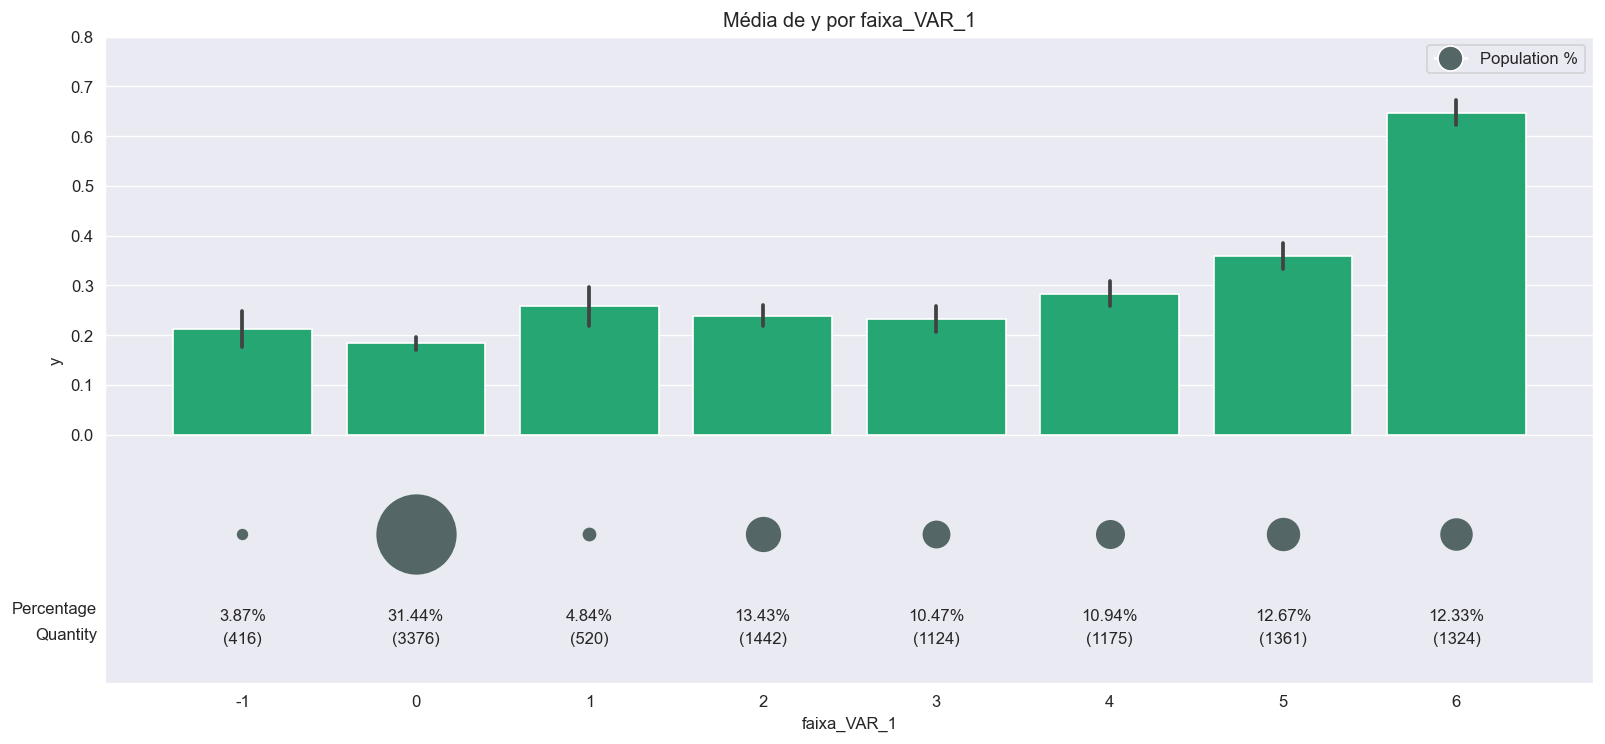

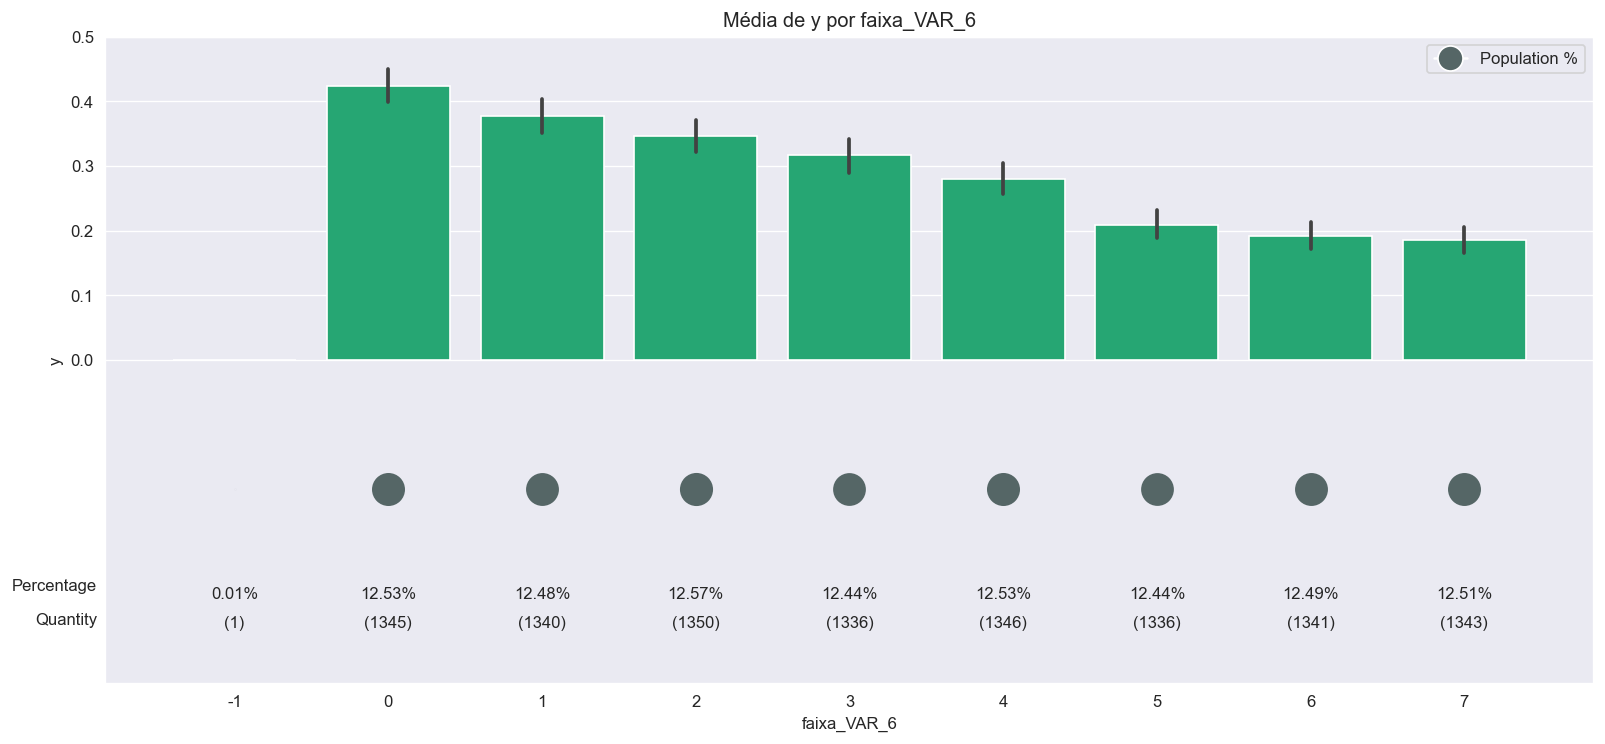

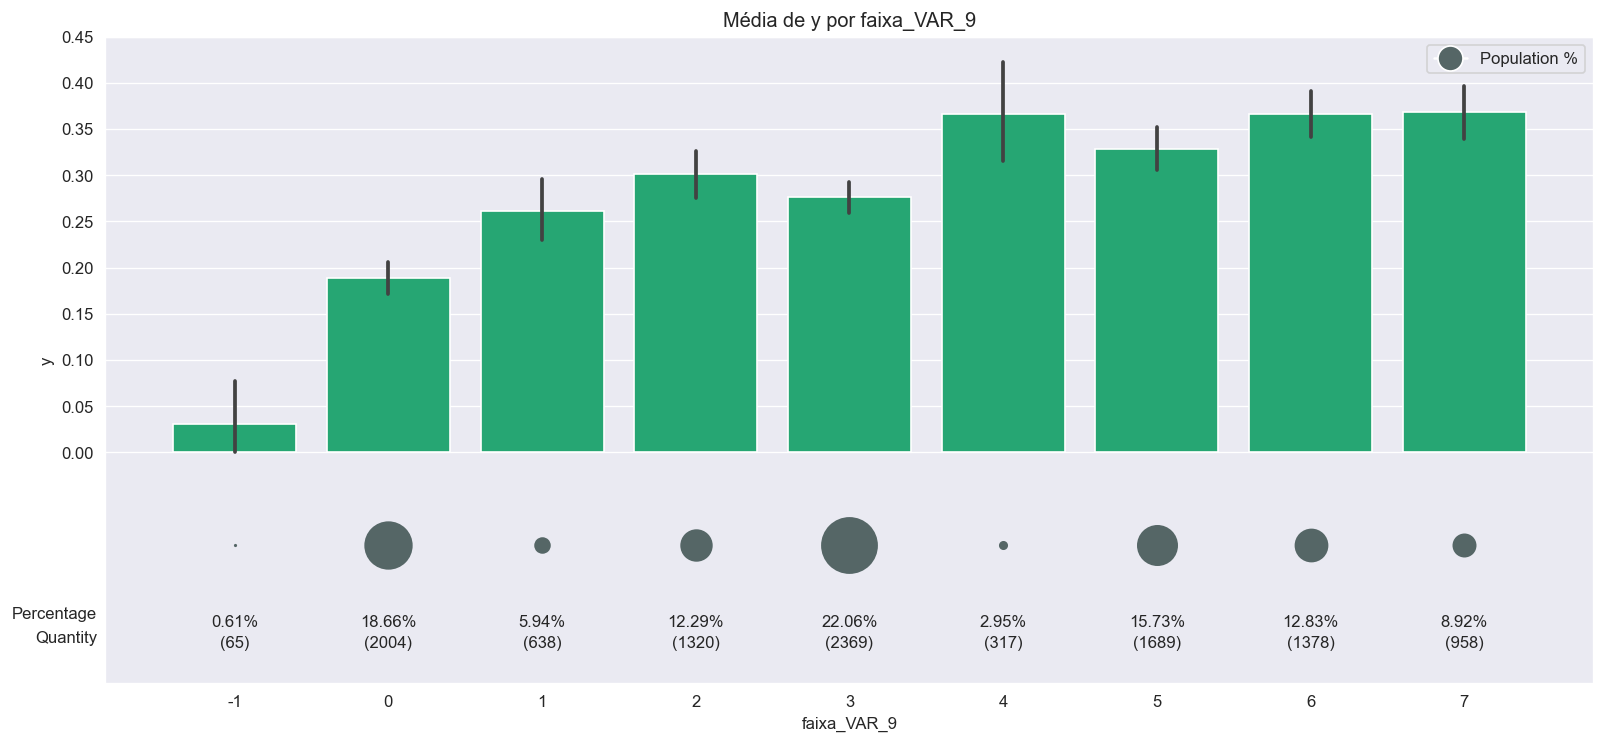

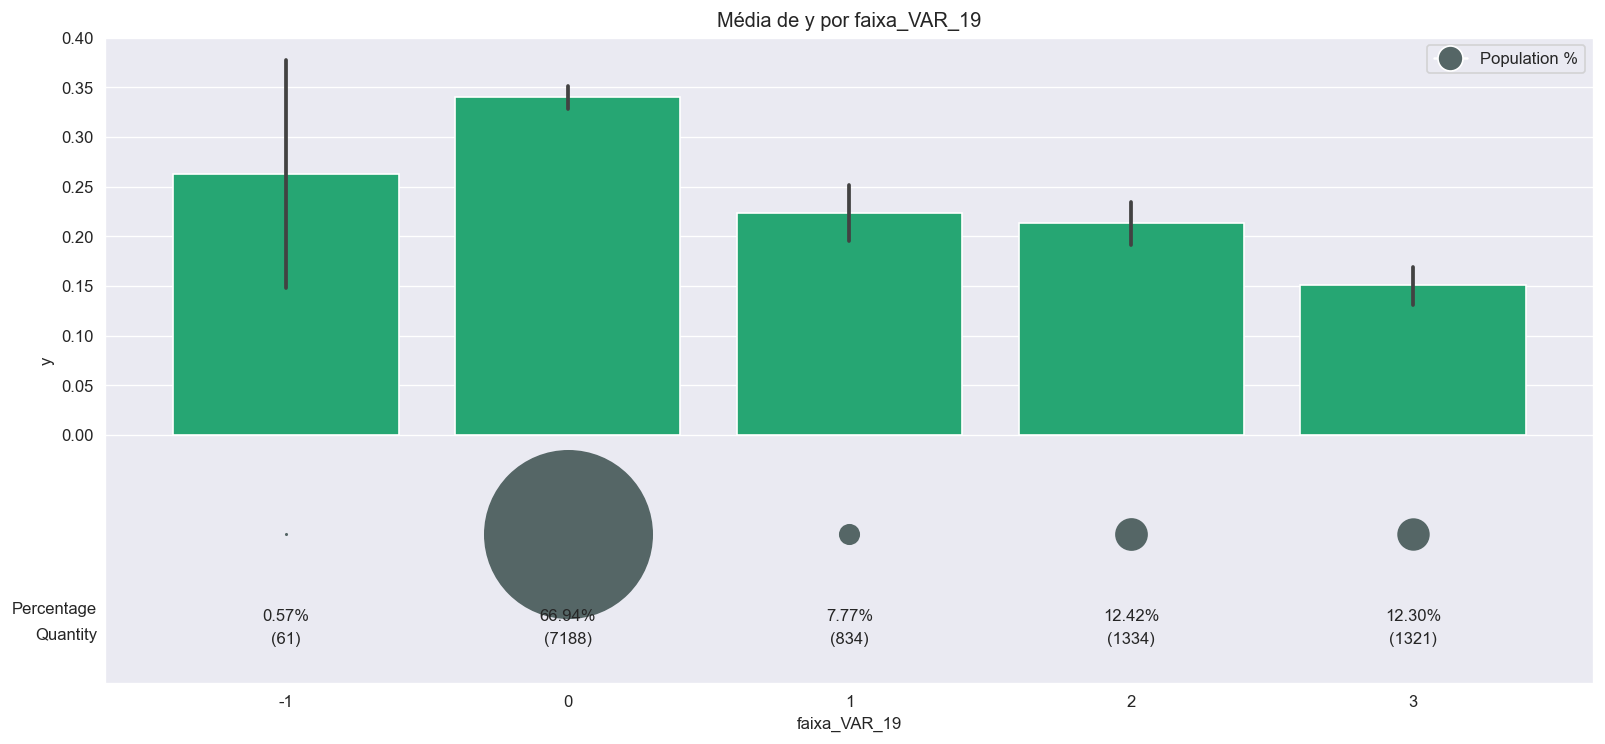

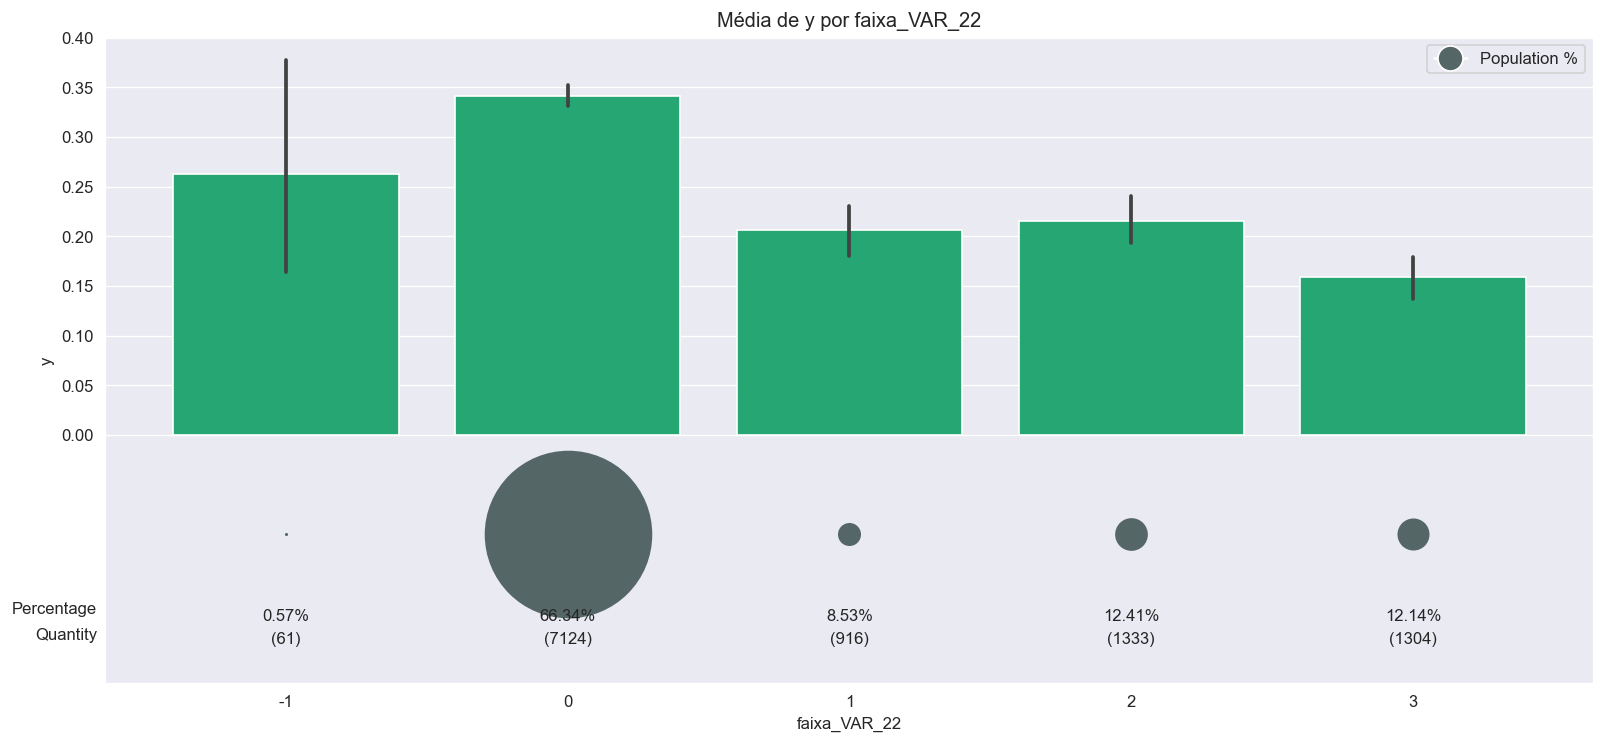

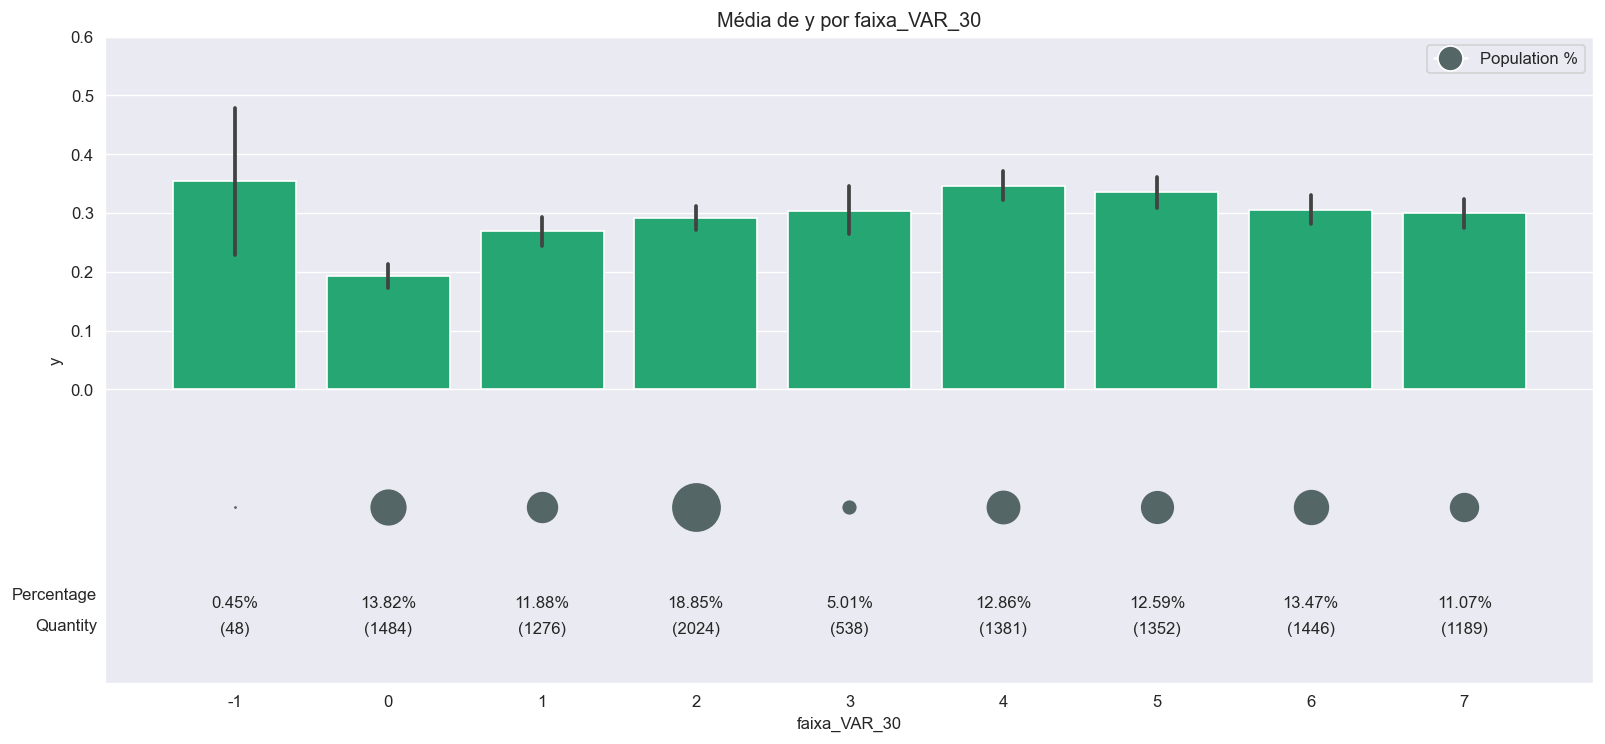

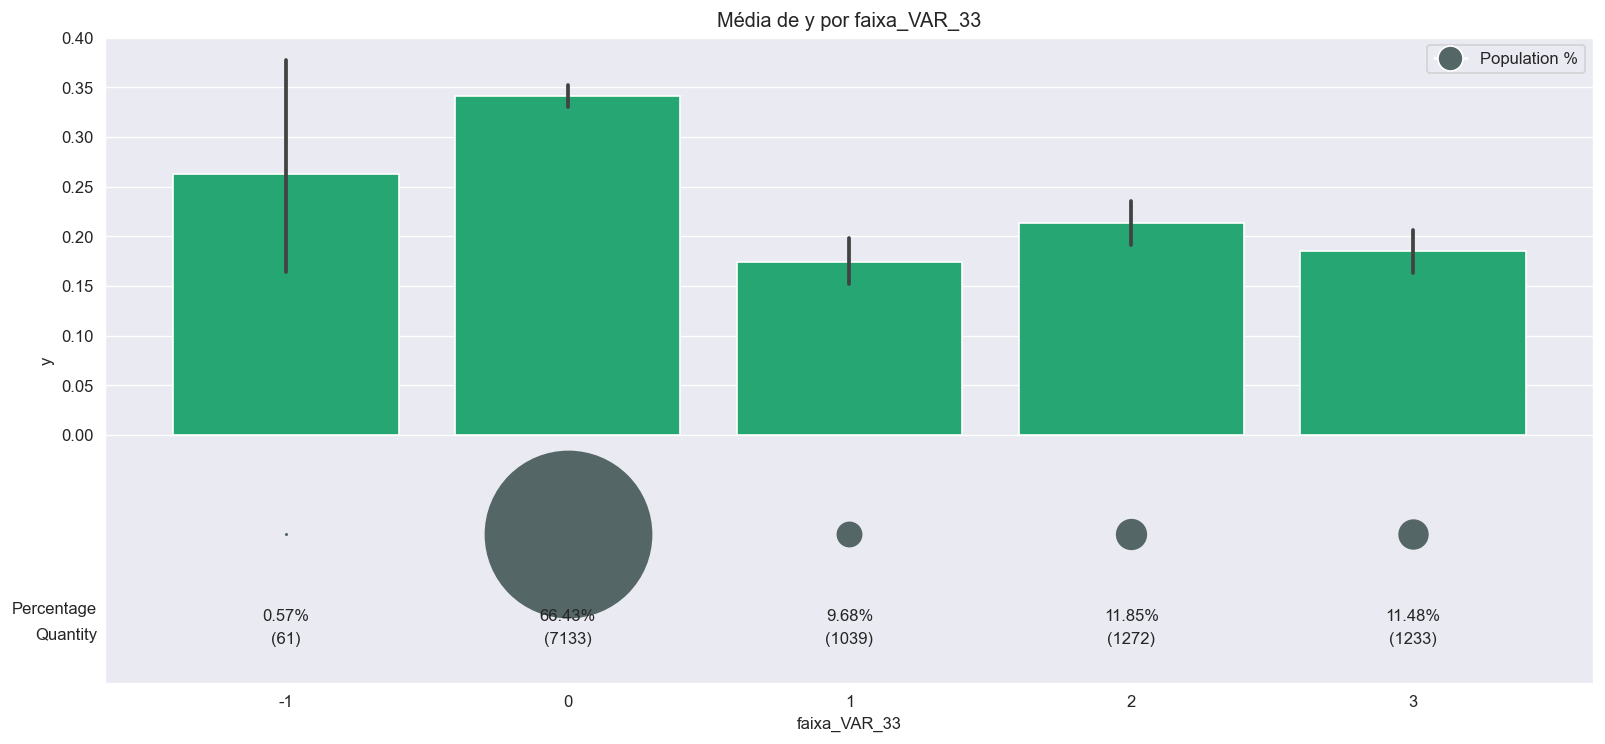

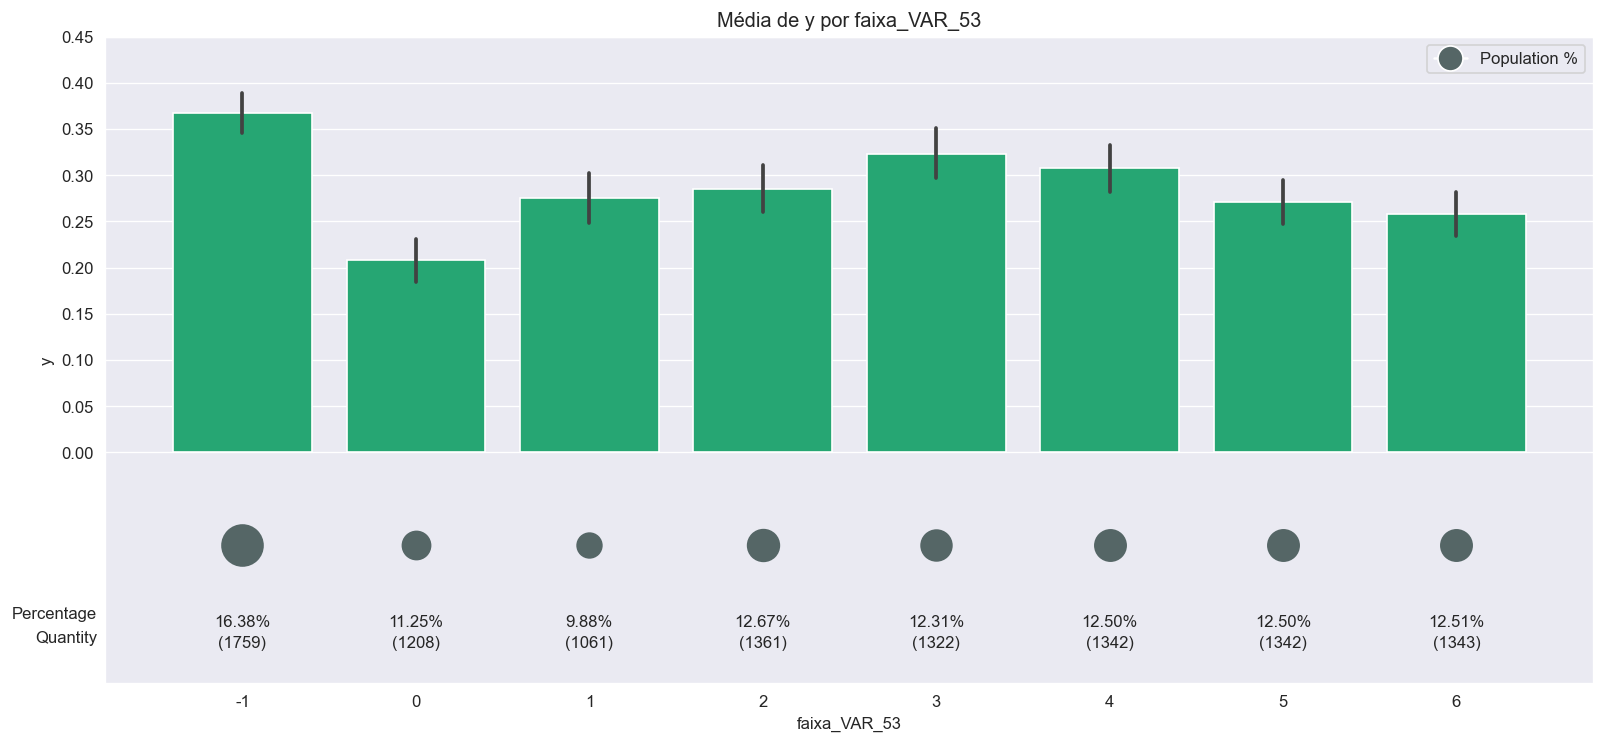

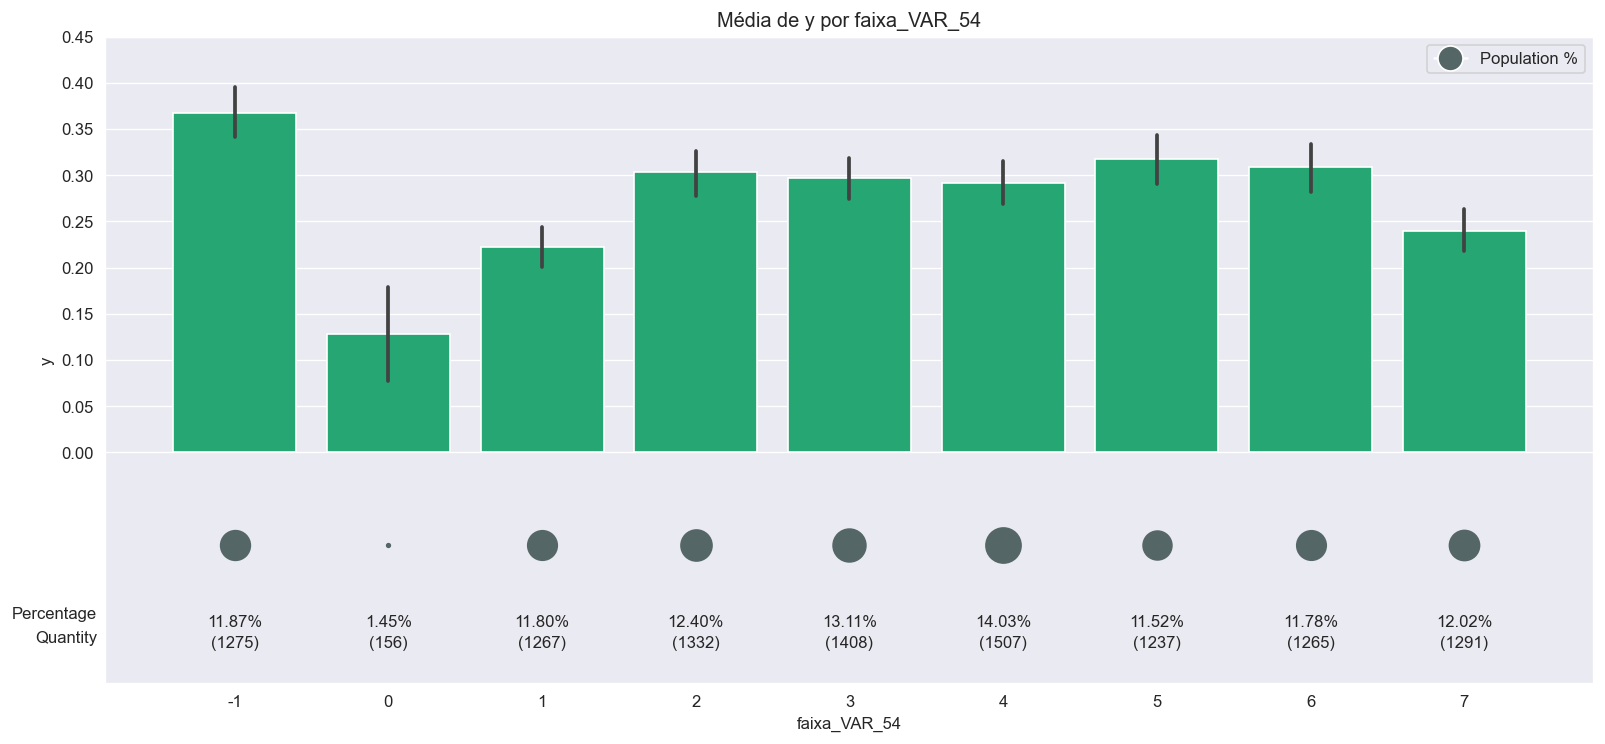

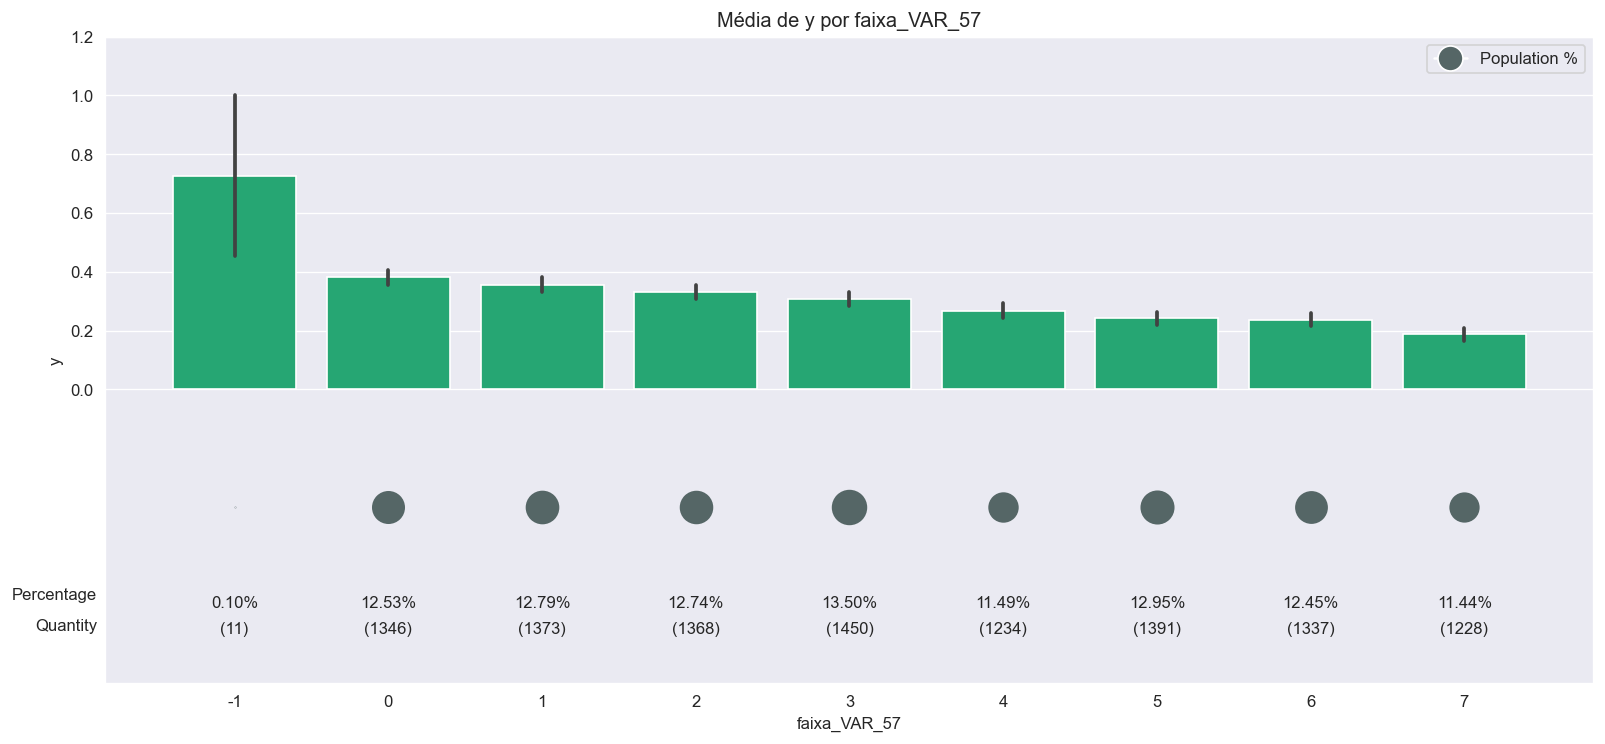

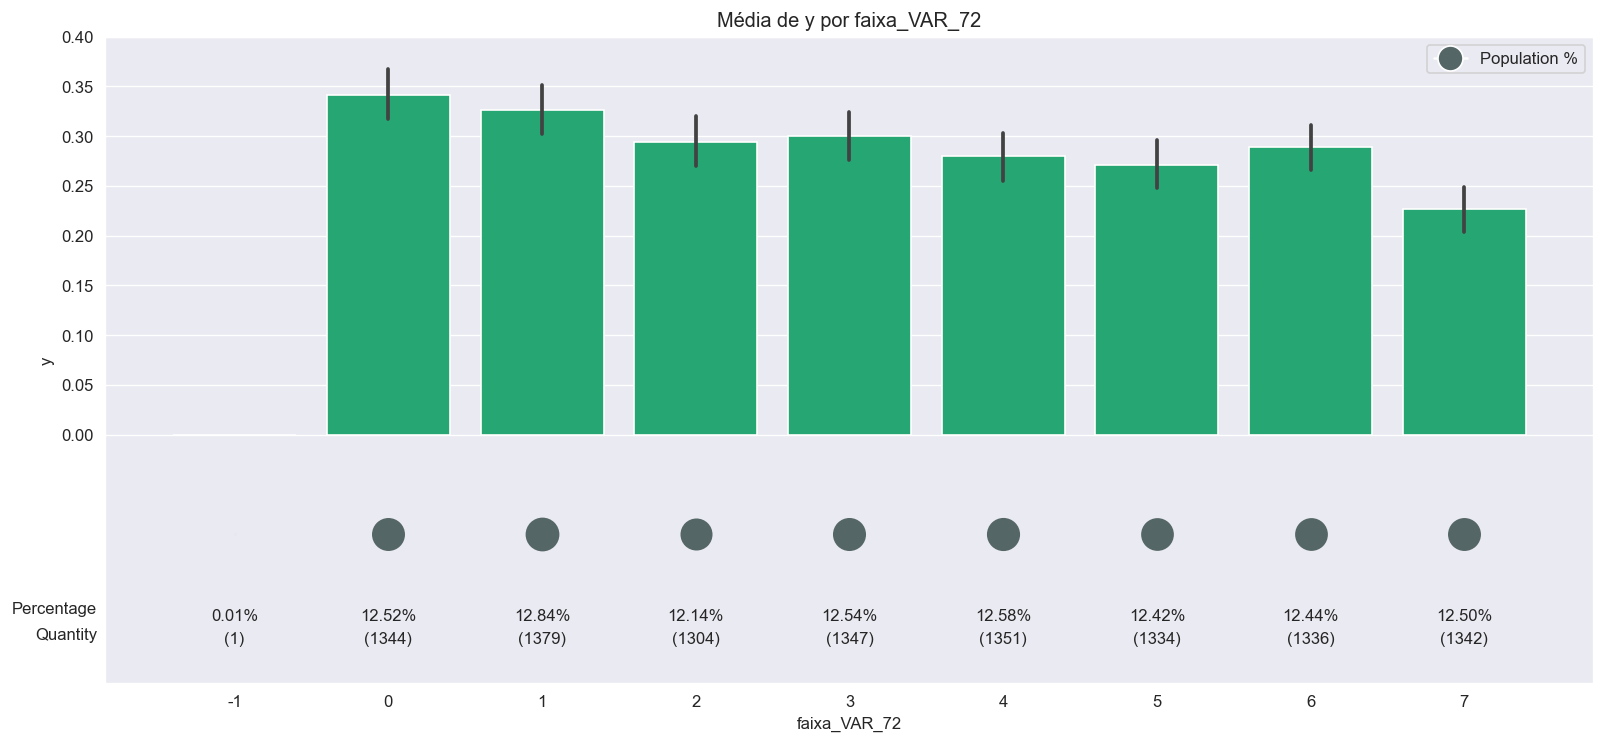

In [33]:
for feat in numerical_cols:
    bar_plot_population_numeric(df_filter, feat, 'y')

### 5.1 Análise com o Target - Features Categóricas

Proporção de Nulos de VAR_2: 0.0
Proporção de Nulos de VAR_3: 0.0
Proporção de Nulos de VAR_4: 0.0
Proporção de Nulos de VAR_20: 0.0
Proporção de Nulos de VAR_25: 0.0
Proporção de Nulos de VAR_28: 0.0
Proporção de Nulos de VAR_32: 0.0
Proporção de Nulos de VAR_40: 0.0
Proporção de Nulos de VAR_44: 0.0
Proporção de Nulos de VAR_60: 0.0
Proporção de Nulos de VAR_64: 0.0


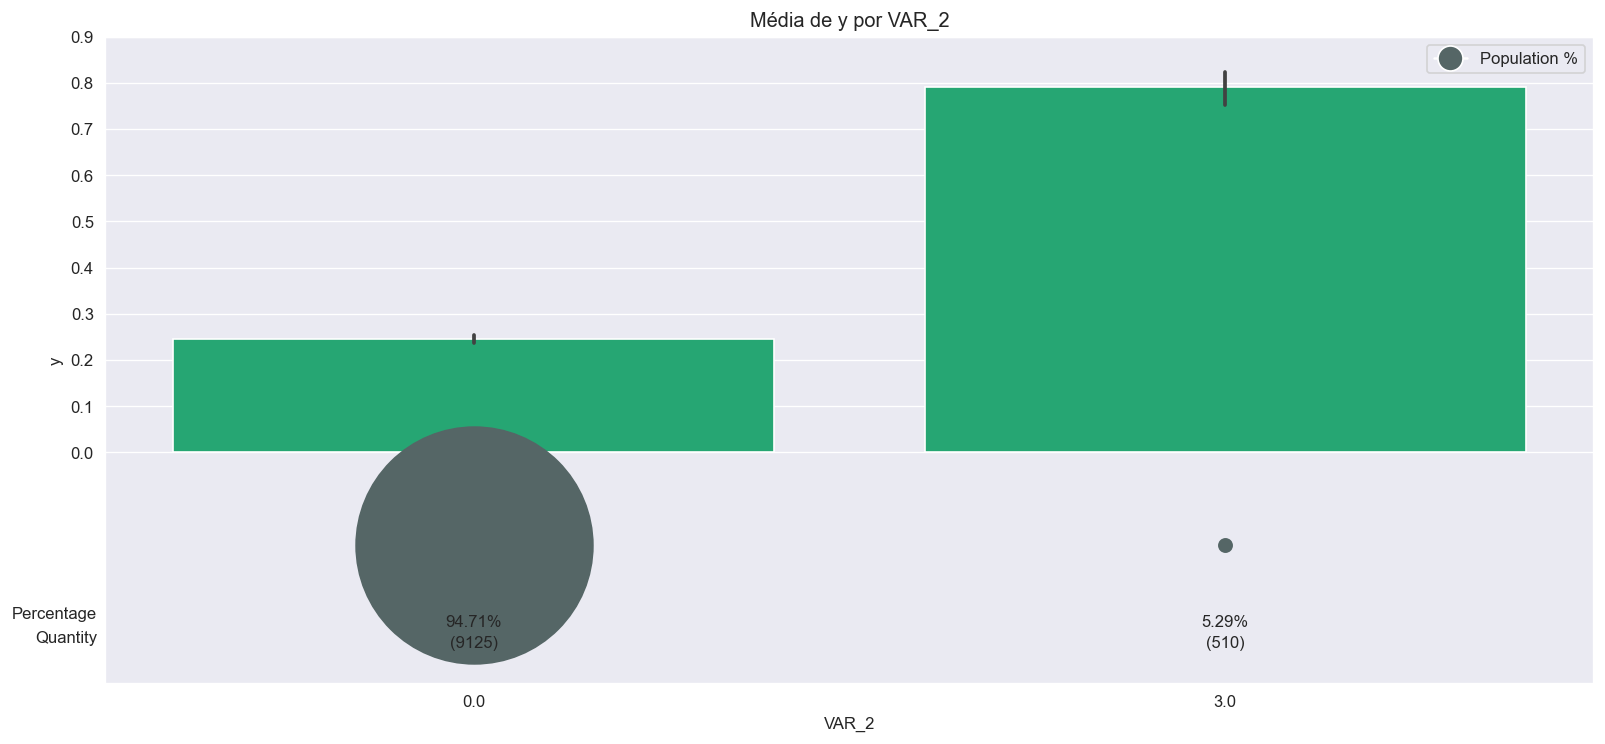

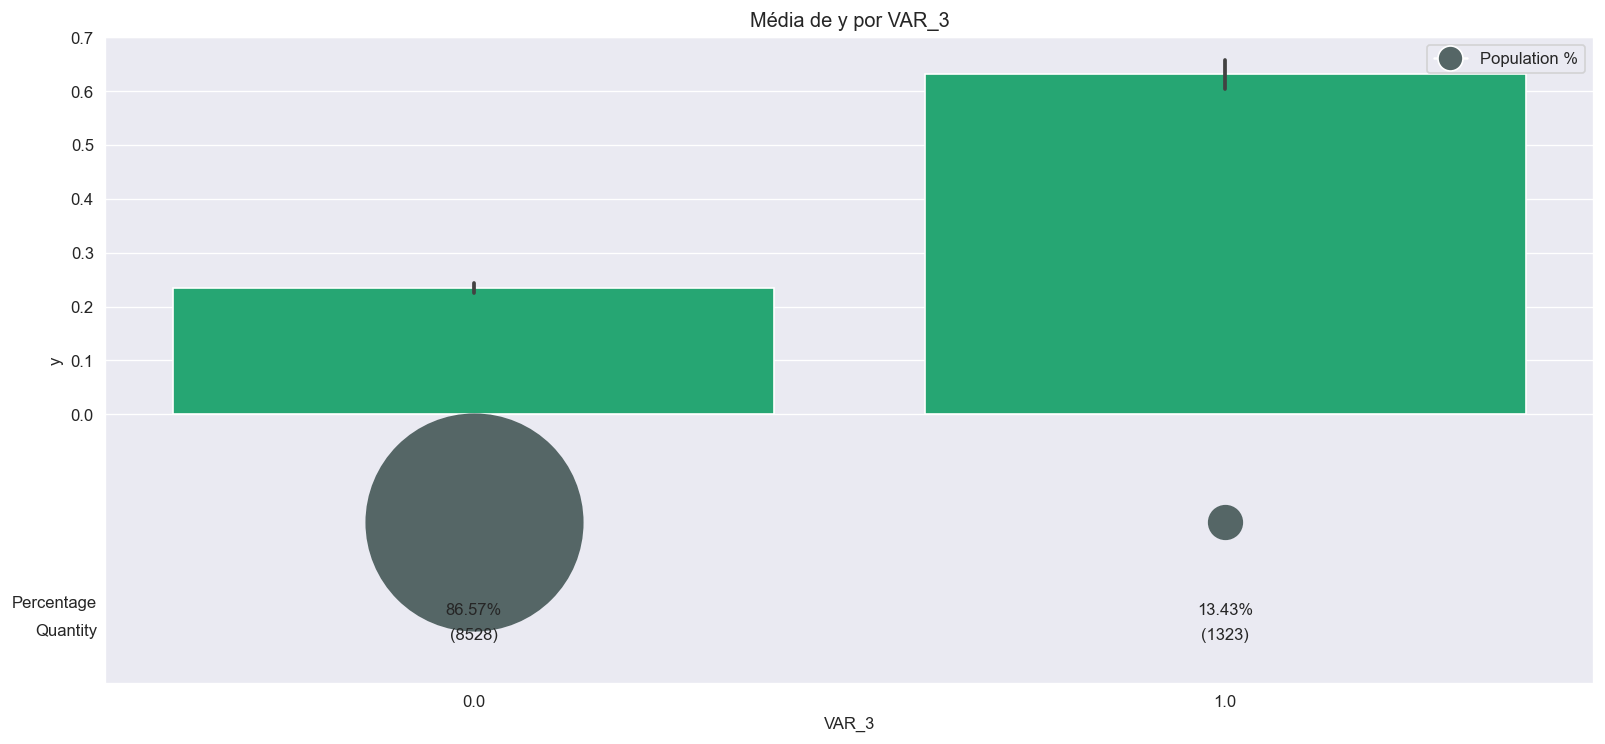

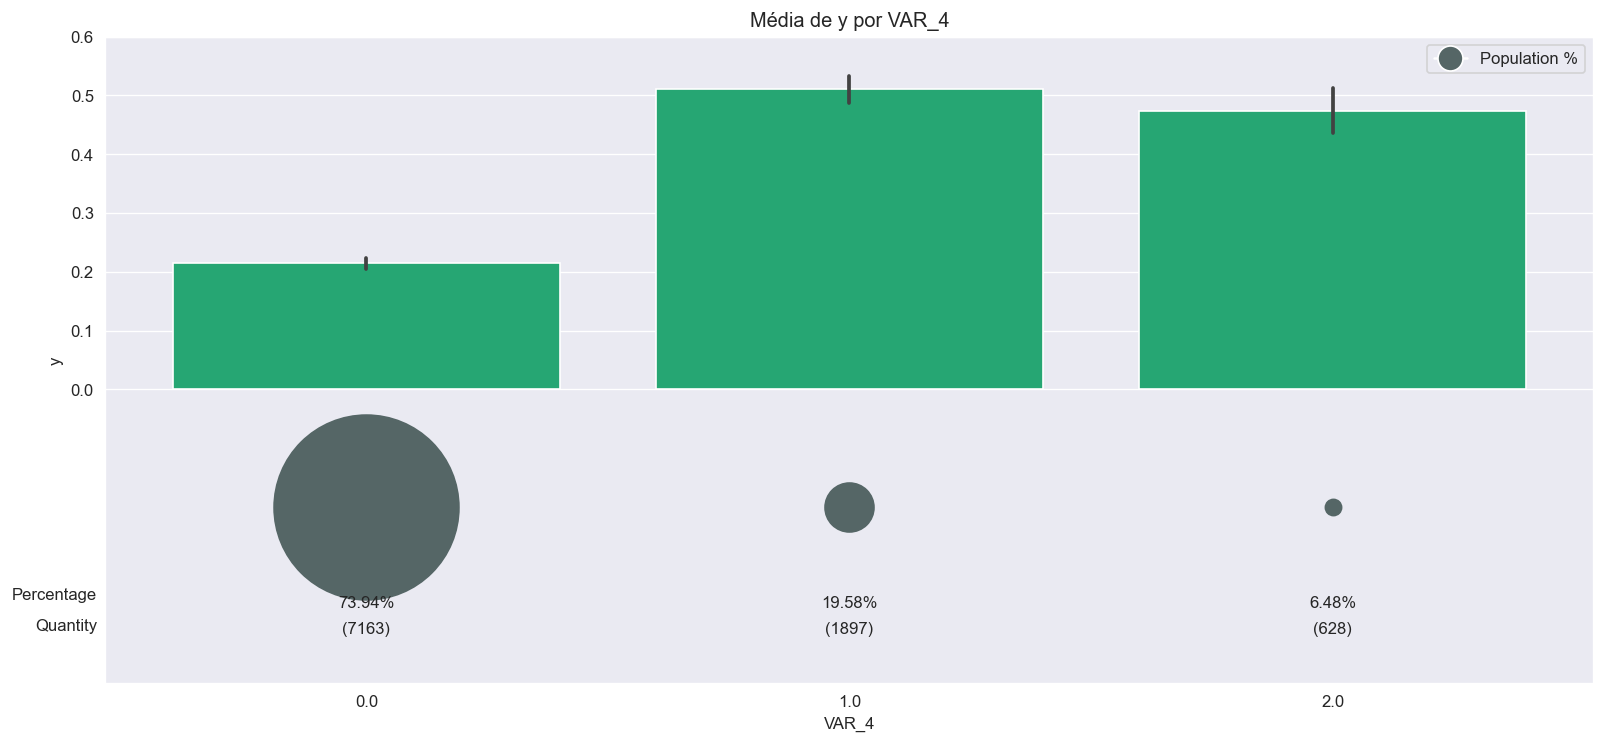

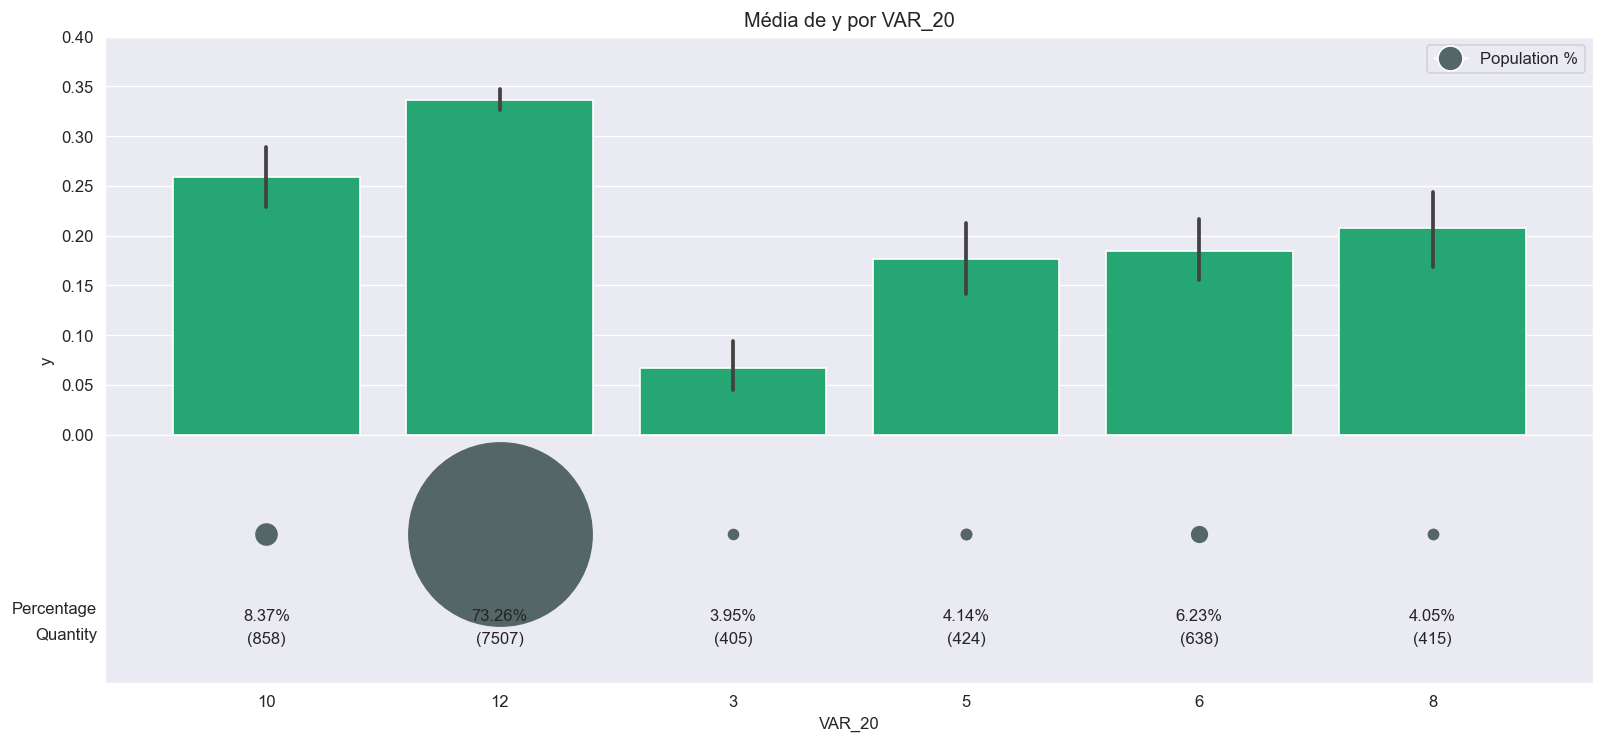

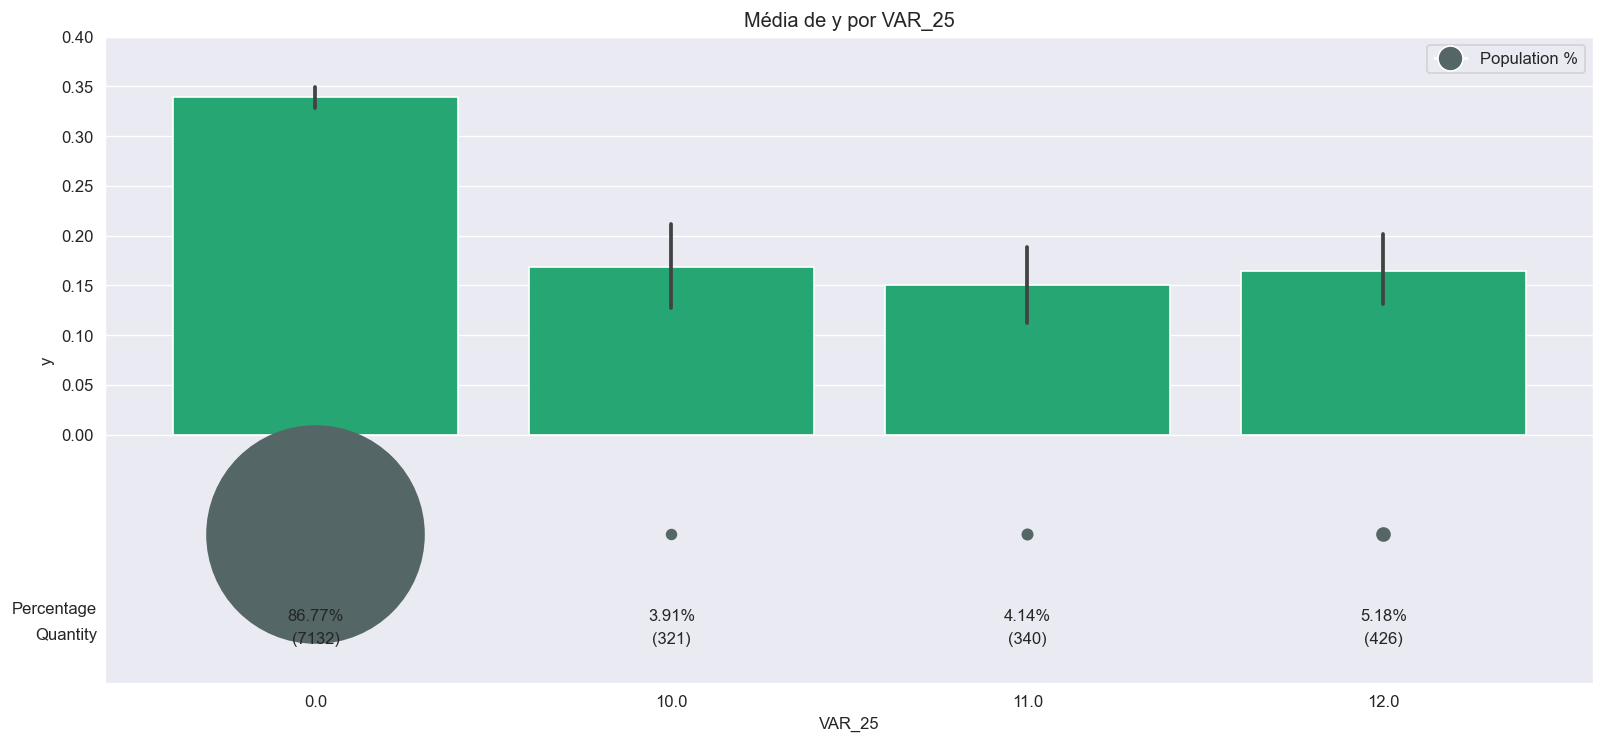

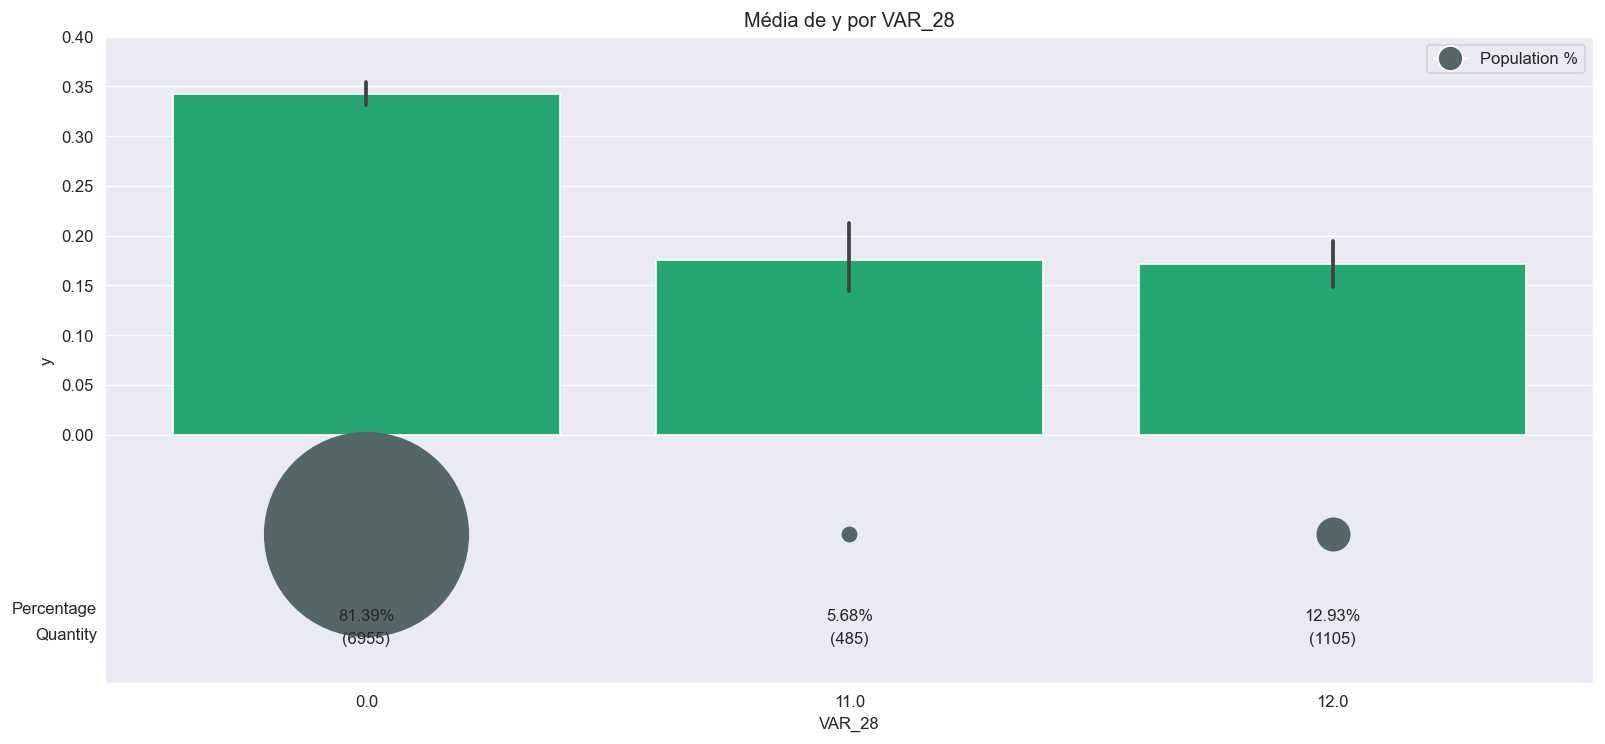

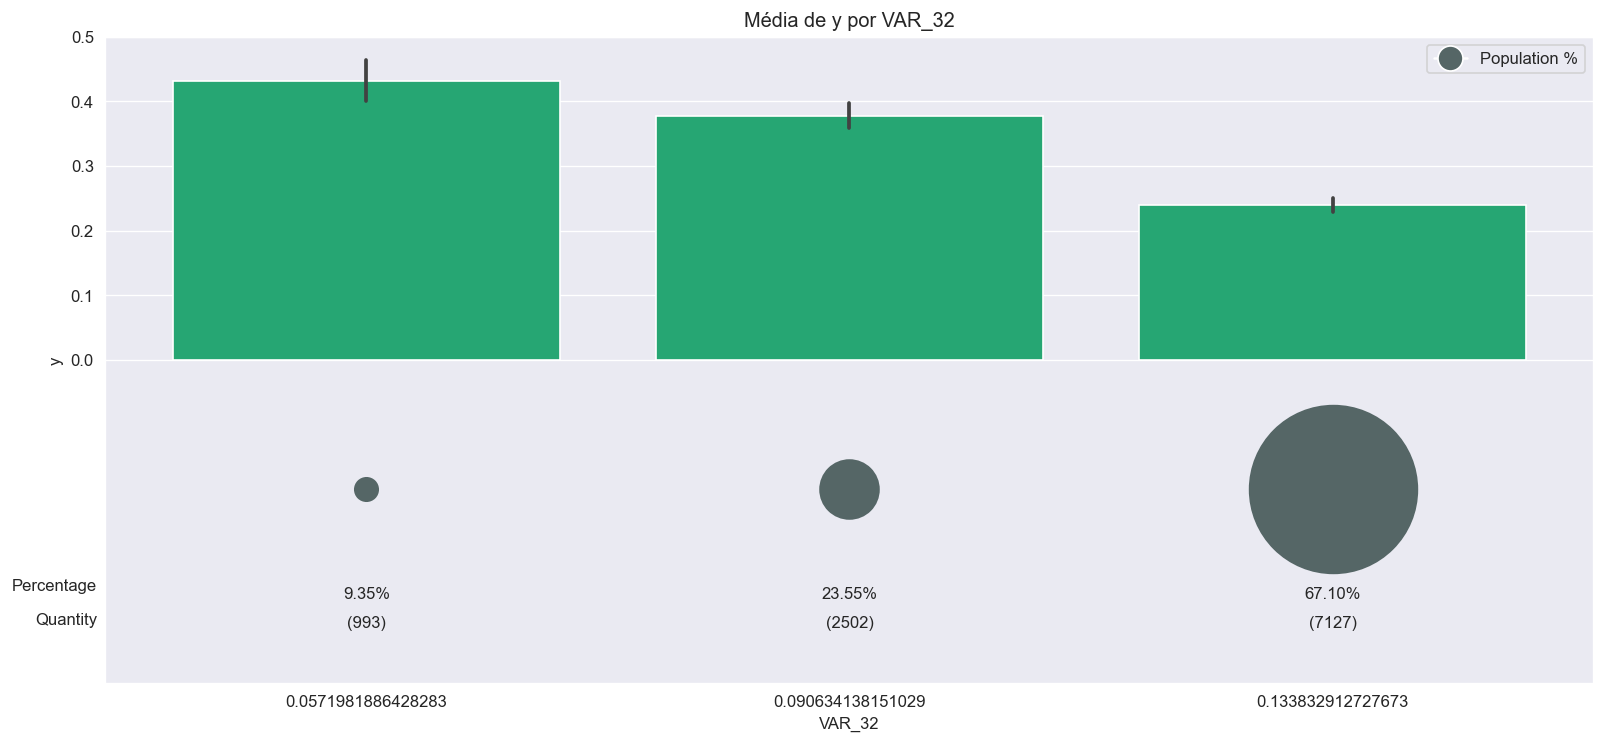

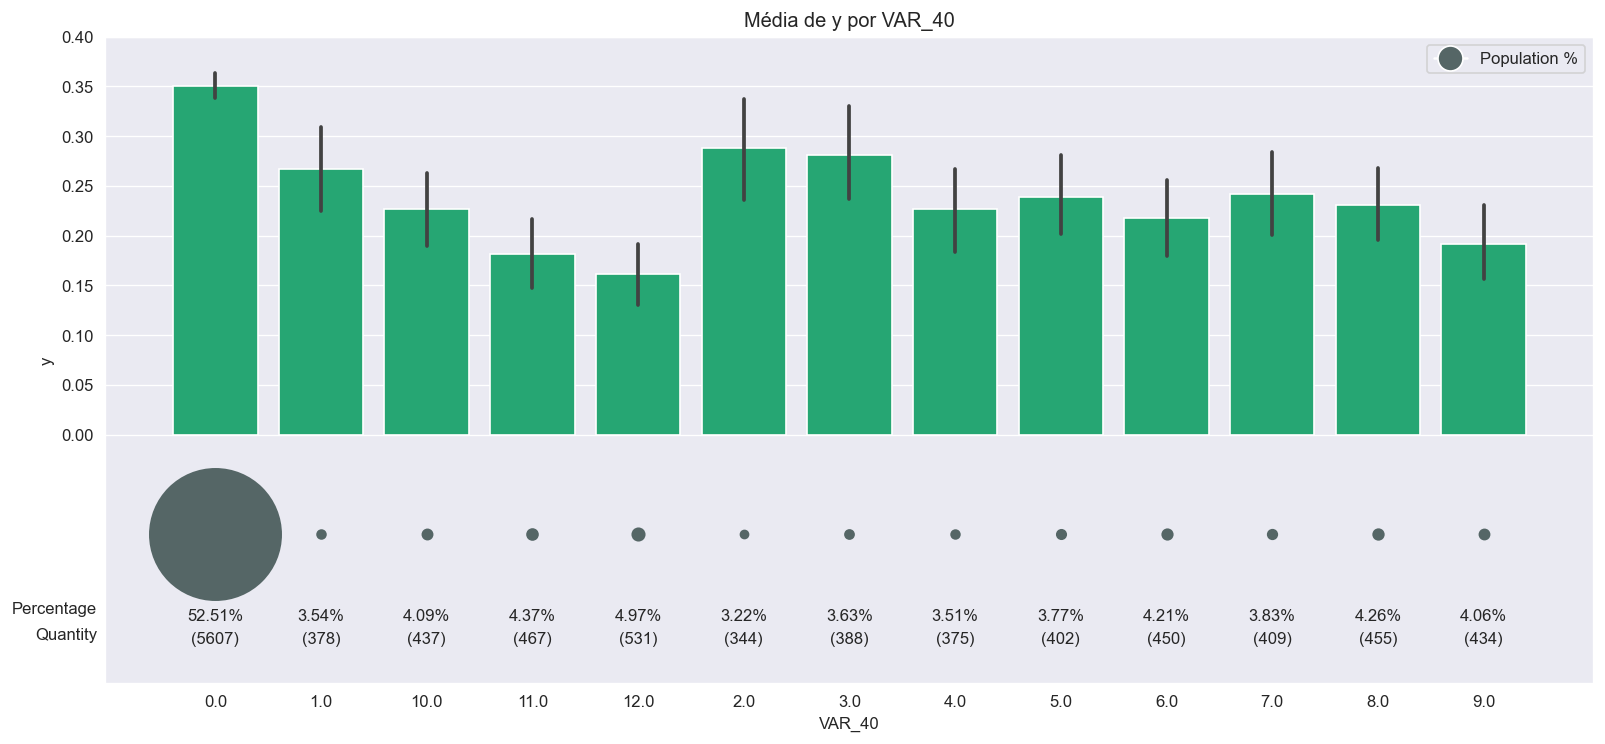

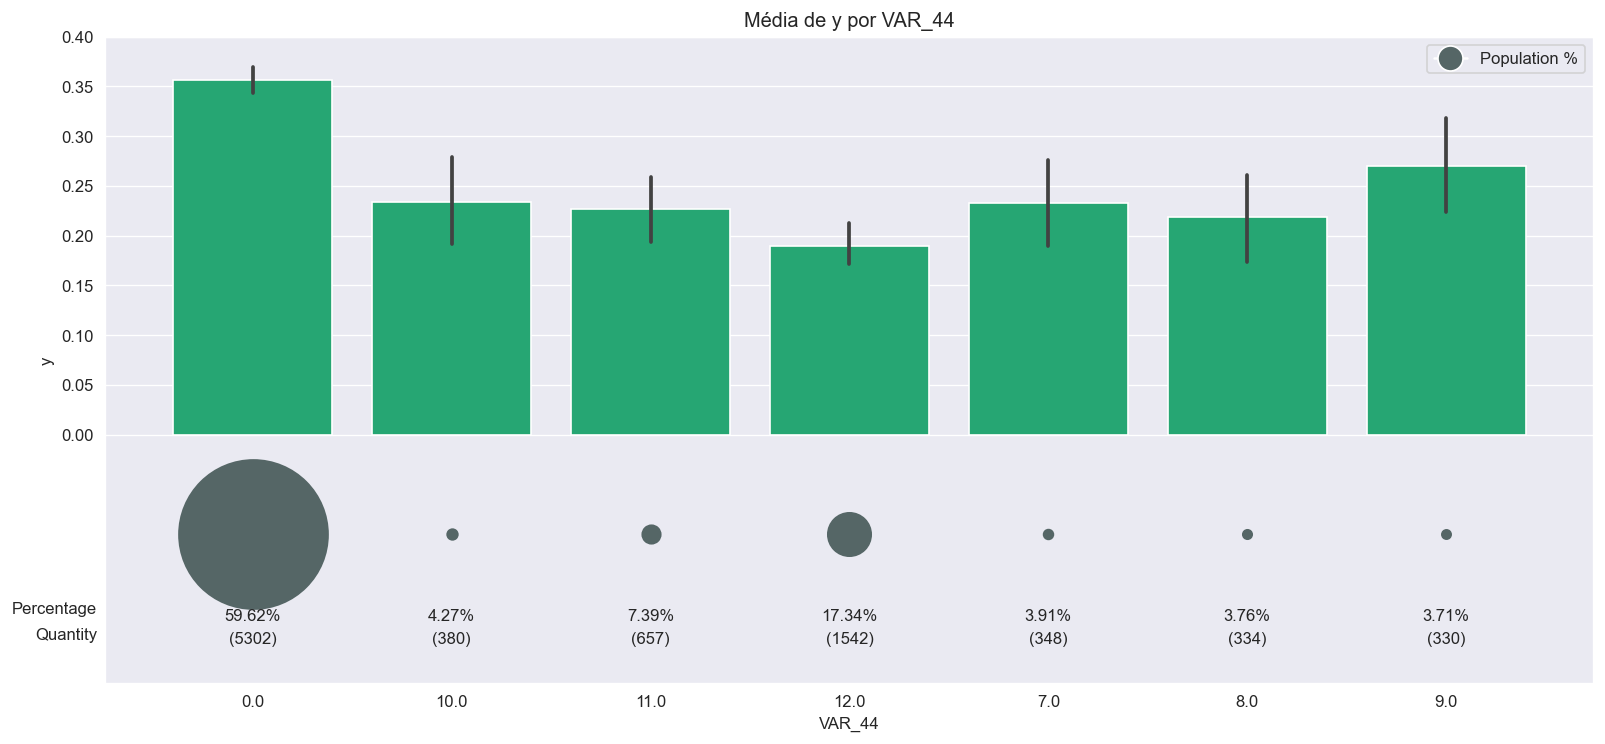

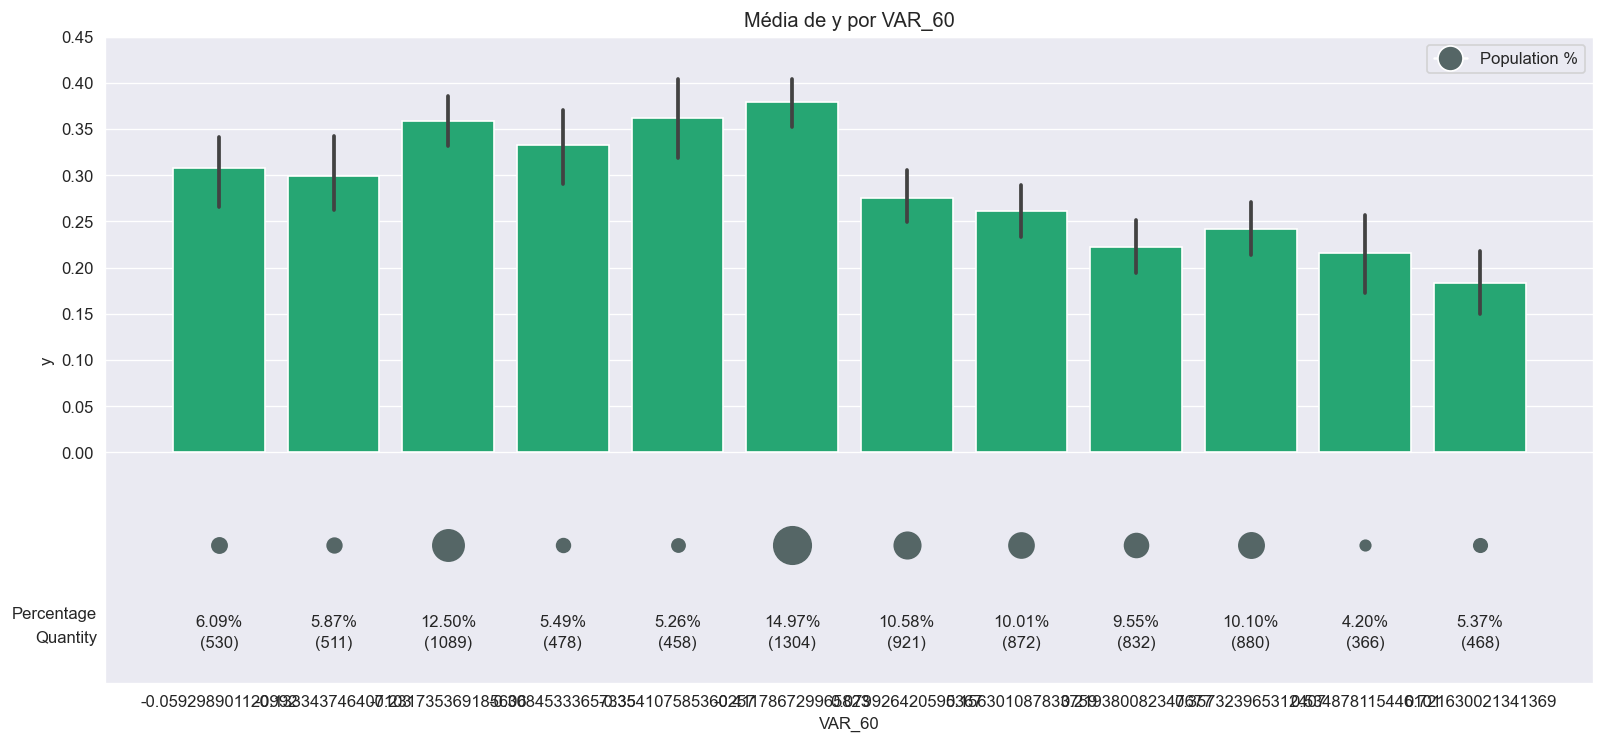

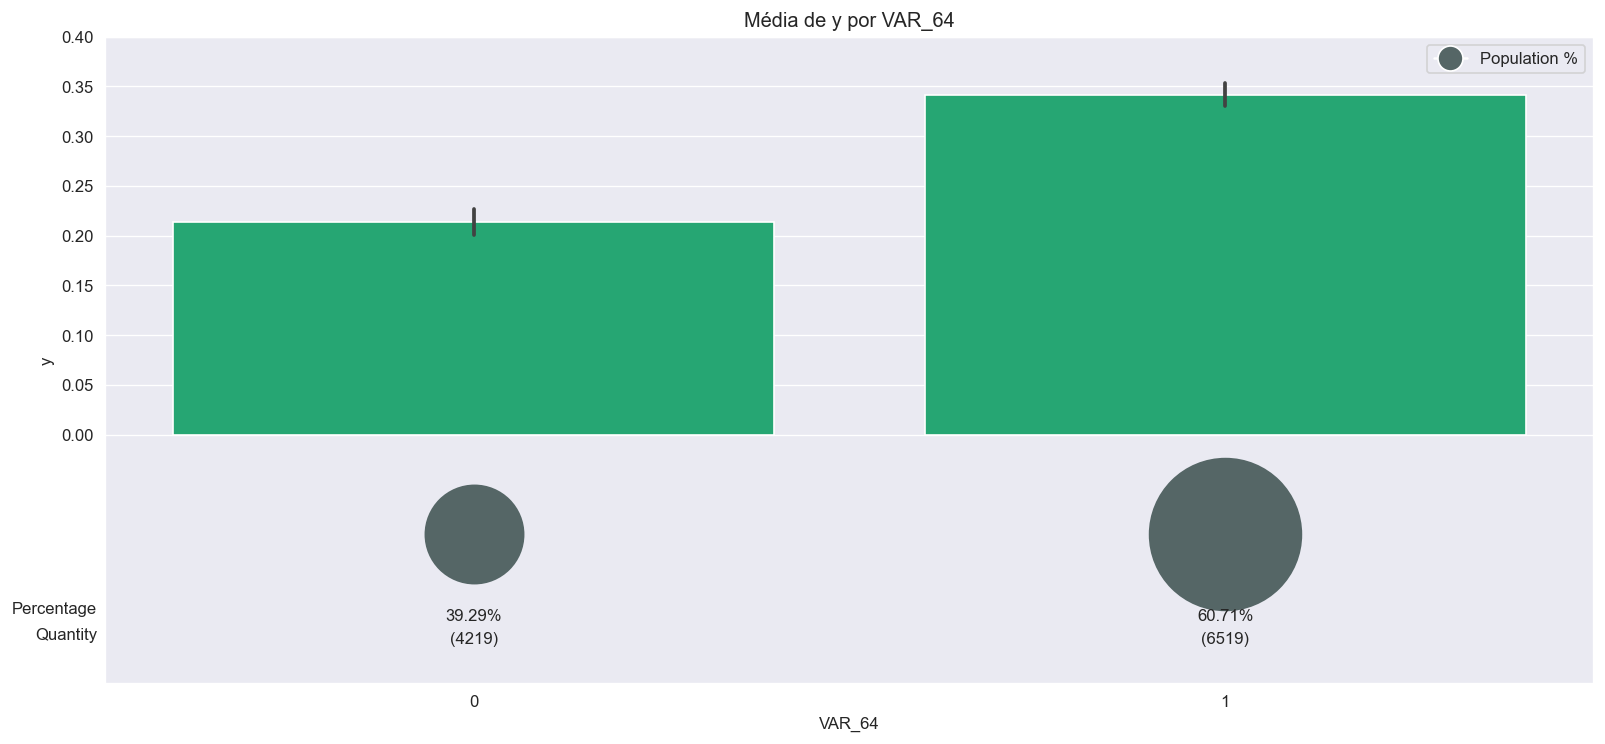

In [34]:
for feat in categorical_cols:
    bar_plot_population_categorical(df_filter, feat, 'y')

### Observações
* Variáveis Numéricas:
    * É possível identificar algumas variáveis que possuem um bom ordenamento das médias com o target. Essas variáveis serão selecionadas para análise de sua dsitribuição na próxima sessão
    * As variáveis são VAR_1, VAR_6, VAR_9, VAR_19, VAR_30, VAR_57 e VAR_57
    * Nem todas todas possuem um ordenamento claro, porém possuem um forte indício de uma boa relação com o target

* Variáveis Categóricas:
    * Nesse conjunto de variáveis que há uma boa oportunidade de criar agrupamentos que fortaleçam a relação com o target.
    * Todas as features, menos a VAR_44 têm uma boa relação com a variável target. Essas features serão as selecionadas para a análise de distribuição da próxima etapa.

## 6. Distribuição das Features e Análise no Tempo

In [35]:
# Criando uma lista com as variáveis selecionadas para a análise de desitribuição e originação (por safra)
selected_numeric_features = ['VAR_1', 'VAR_6', 'VAR_9', 'VAR_19', 'VAR_30', 'VAR_57', 'VAR_72']
selected_categorical_features = ['VAR_2', 'VAR_3', 'VAR_4', 'VAR_20', 'VAR_25', 'VAR_28', 'VAR_32', 'VAR_40', 'VAR_60', 'VAR_64']

### 6.1 Distribuição e Boxplot - Features Numéricas

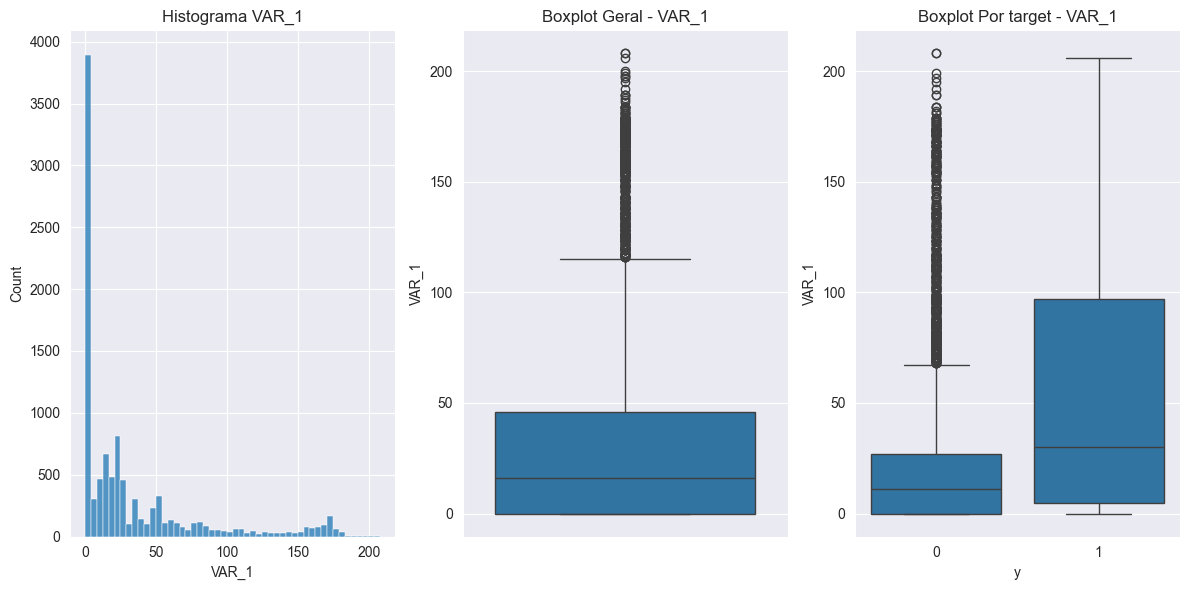

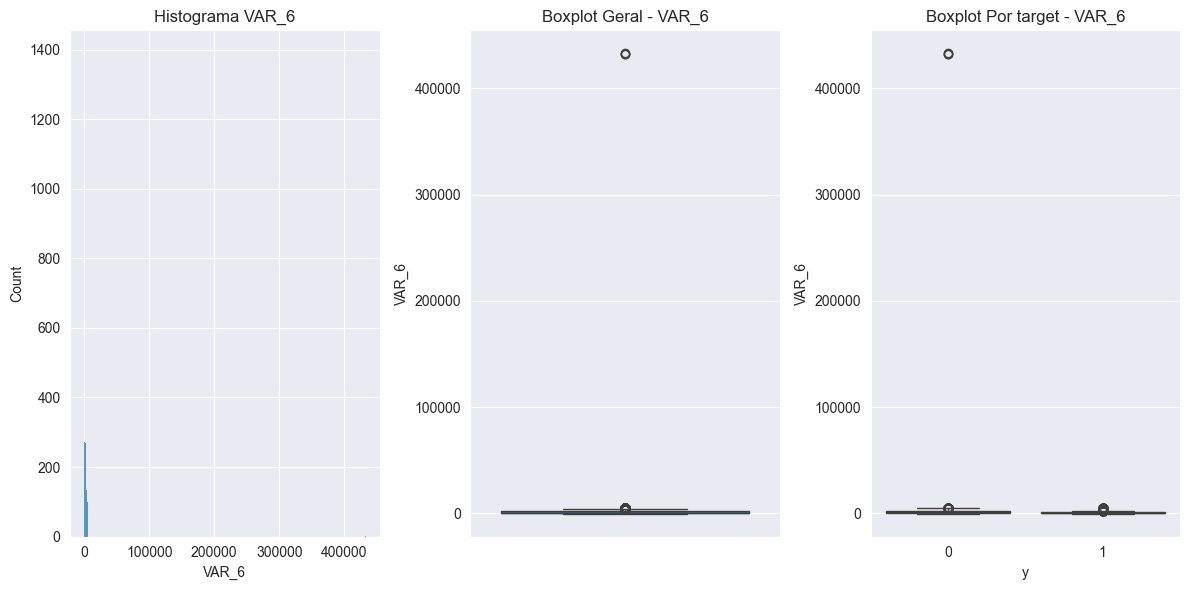

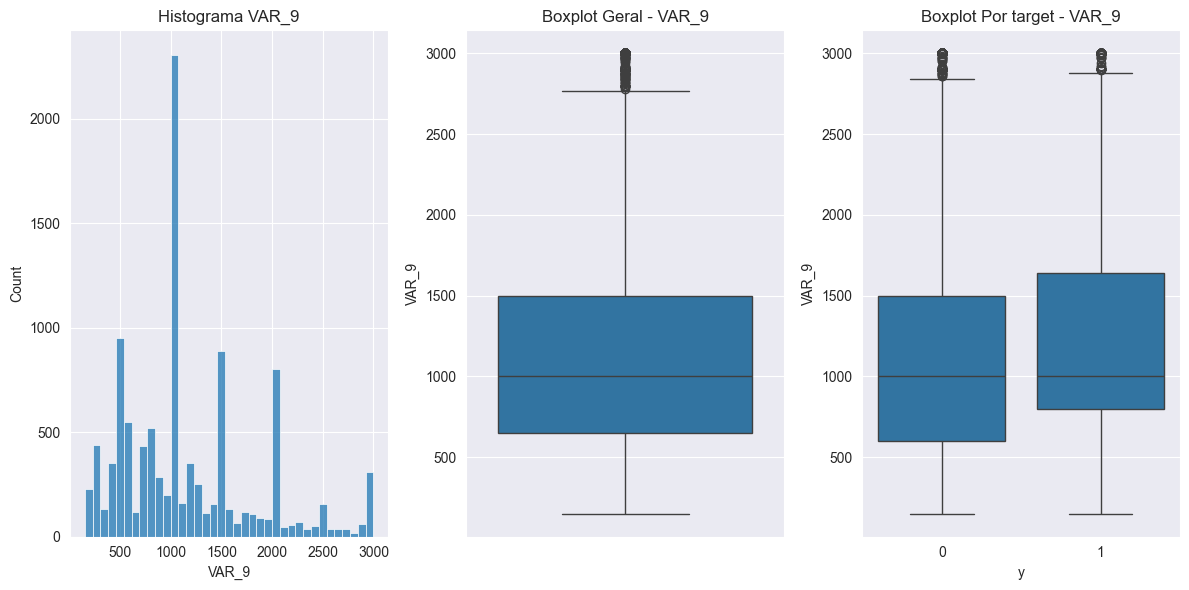

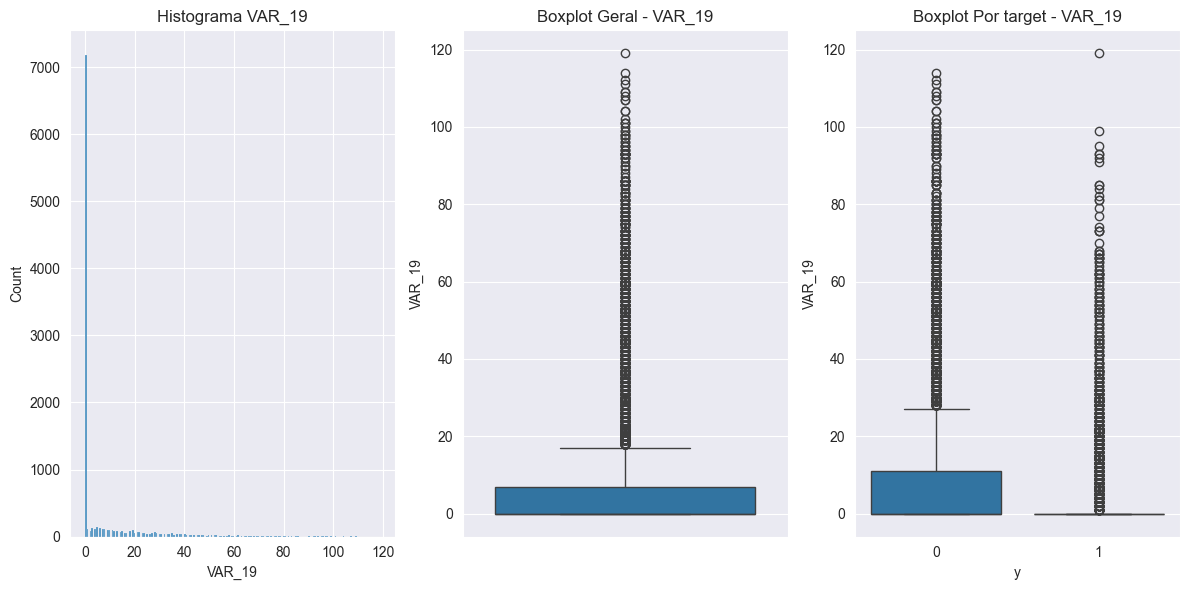

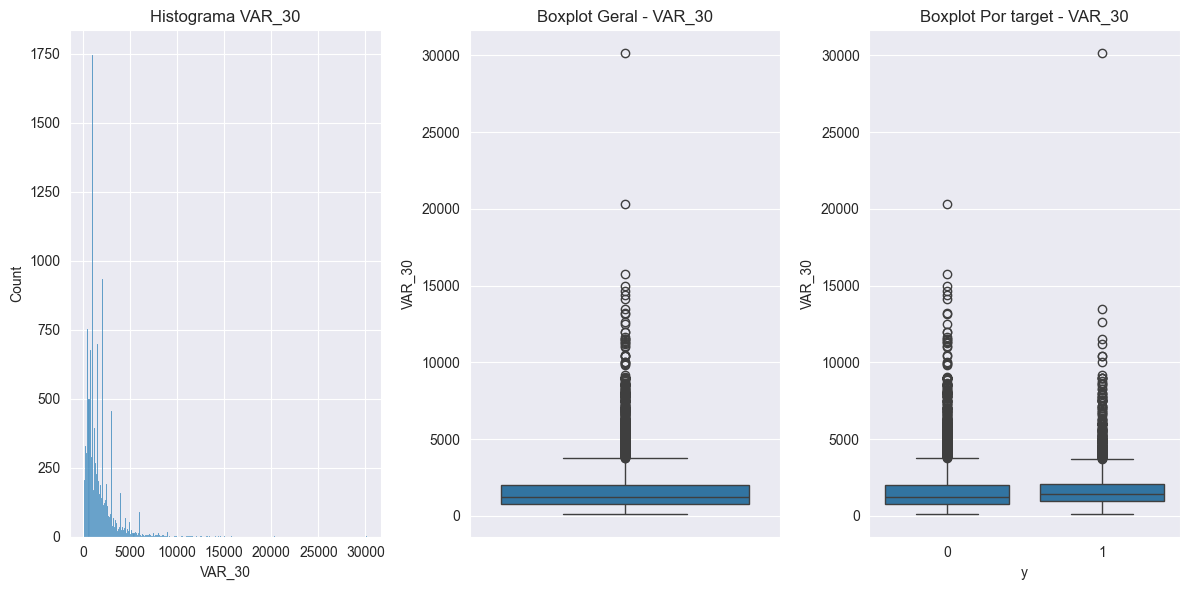

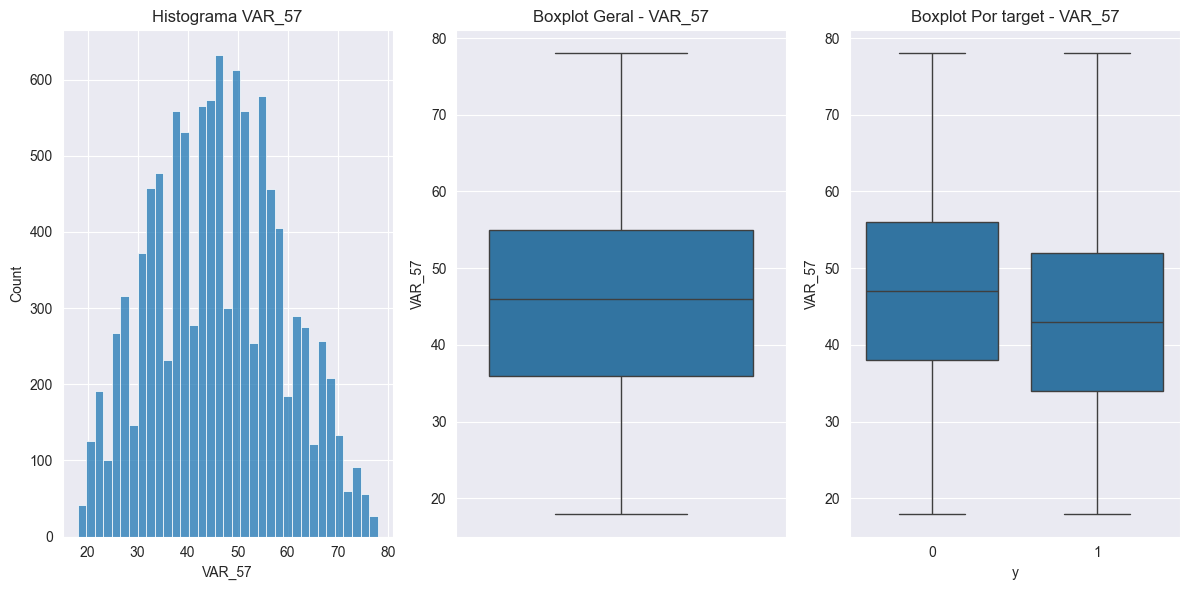

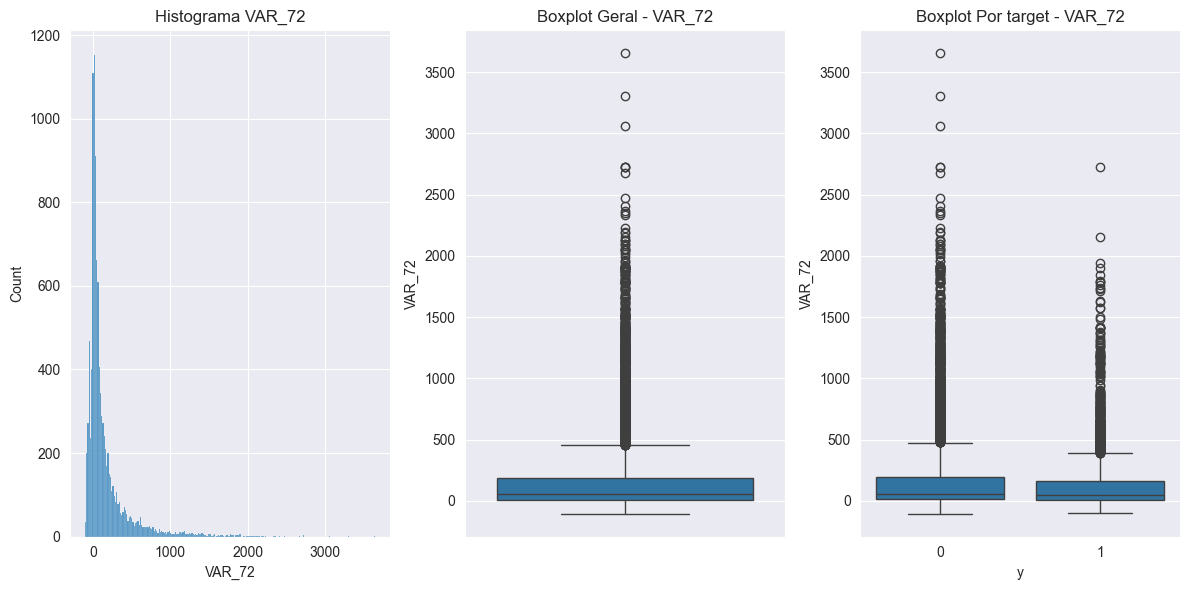

In [36]:
# Vamos plotar uma série de gráifocs que contenham o histograma da variável numérica e dois boxplots, um geral e um separado por valor do target
for feat in selected_numeric_features:
    # Criando a figura e os eixos para os subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    # Plotando o displot no primeiro eixo
    sns.histplot(df[feat], ax=axes[0])
    axes[0].set_title(f'Histograma {feat}')

    # Plotando o boxplot no segundo eixo
    sns.boxplot(y=feat, data=df, ax=axes[1])
    axes[1].set_title(f'Boxplot Geral - {feat}')

    # Plotando o boxplot no segundo eixo
    sns.boxplot(x='y', y=feat, data=df, ax=axes[2])
    axes[2].set_title(f'Boxplot Por target - {feat}')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()

Limite para a VAR_1: 179.0


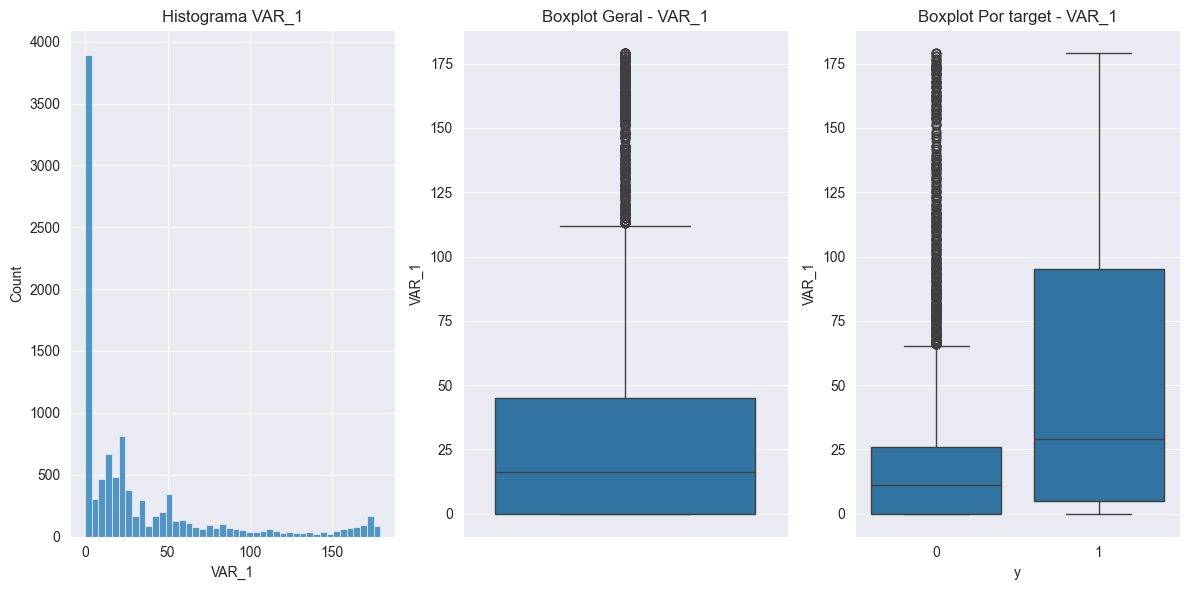

Limite para a VAR_6: 4959.77


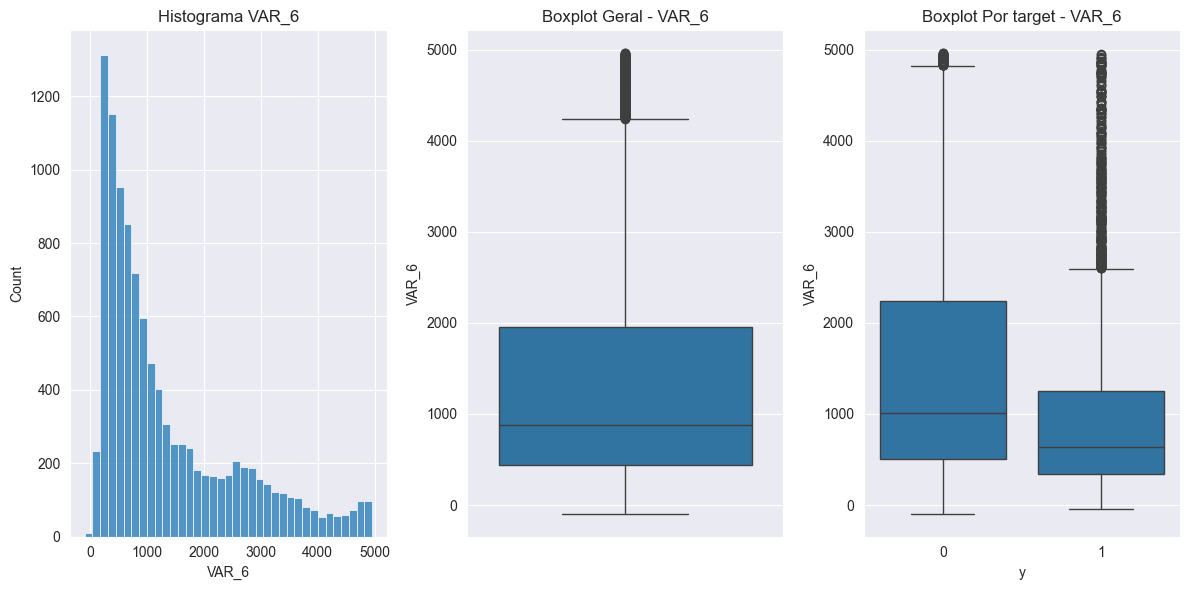

Limite para a VAR_9: 3000.0


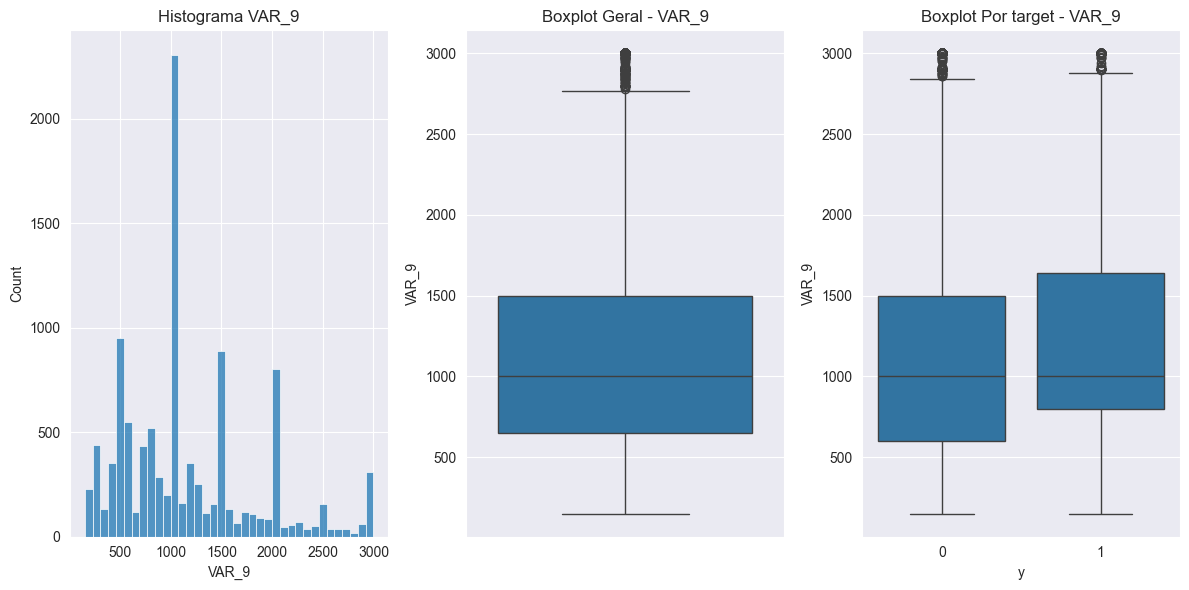

Limite para a VAR_19: 86.0


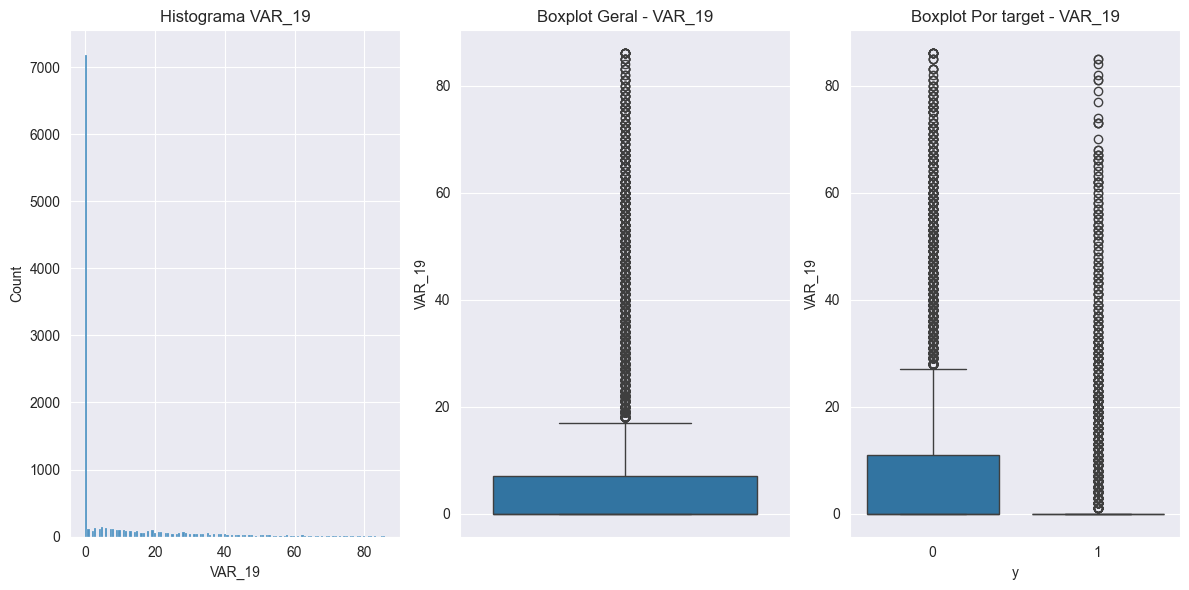

Limite para a VAR_30: 8729.733750000032


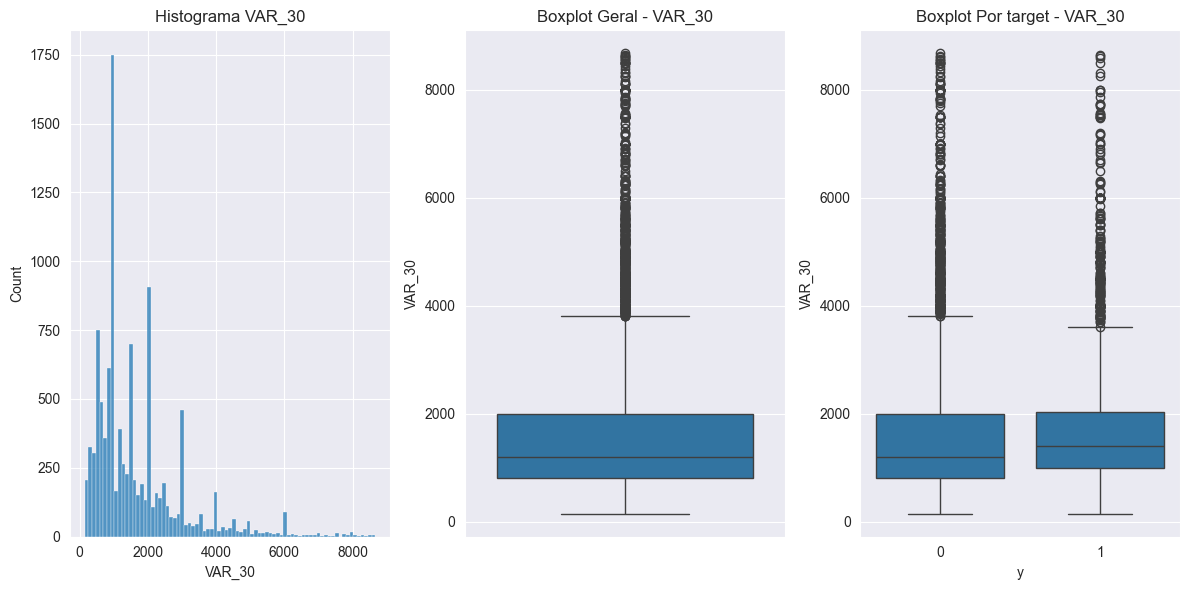

Limite para a VAR_57: 76.0


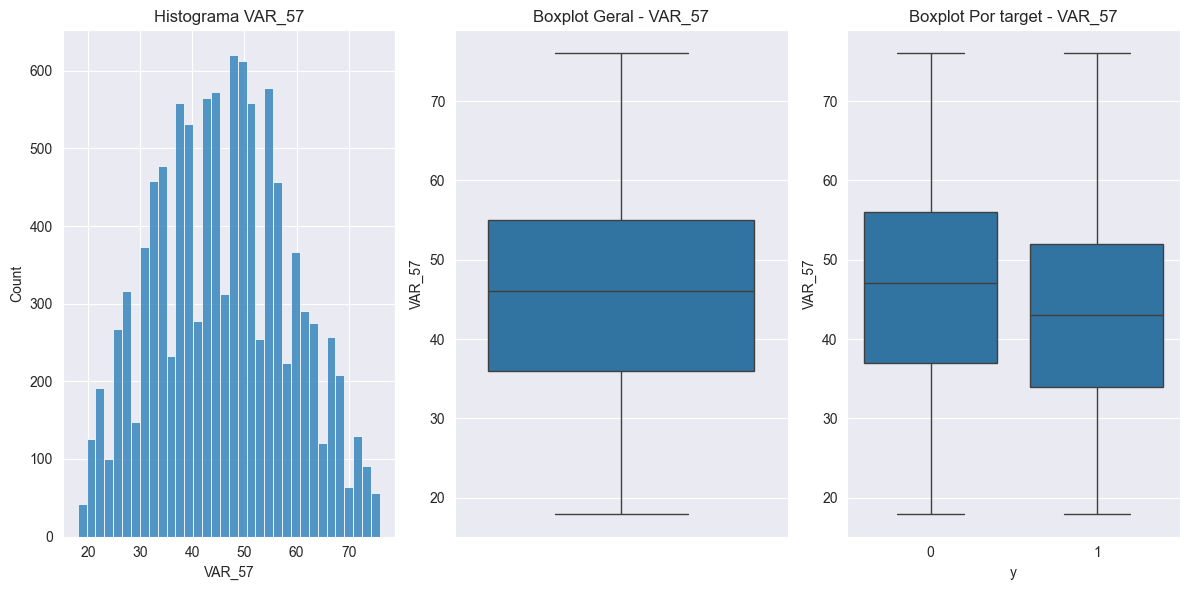

Limite para a VAR_72: 1836.6300000000083


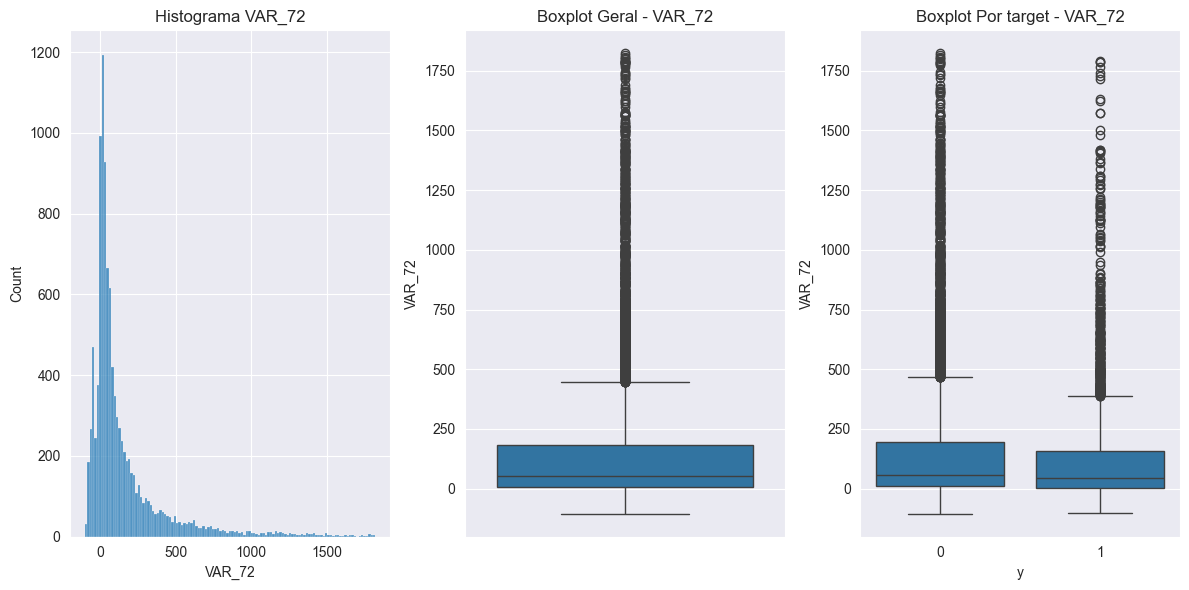

In [43]:
# Como encontramos diversas variáveis com outliers e com caudas para a direita, vamos repetir esse processo porém retirando variáveis nos percentis 99.5
for feat in selected_numeric_features:
    # Criando o limite
    limit = np.percentile(df[df[feat].notna()][feat], 99.5)
    print(f'Limite para a {feat}:', limit)

    # Criando a figura e os eixos para os subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    # Plotando o displot no primeiro eixo
    sns.histplot(df[df[feat].le(limit)][feat], ax=axes[0])
    axes[0].set_title(f'Histograma {feat}')

    # Plotando o boxplot no segundo eixo
    sns.boxplot(y=feat, data=df[df[feat].le(limit)], ax=axes[1])
    axes[1].set_title(f'Boxplot Geral - {feat}')

    # Plotando o boxplot no segundo eixo
    sns.boxplot(x='y', y=feat, data=df[df[feat].le(limit)], ax=axes[2])
    axes[2].set_title(f'Boxplot Por target - {feat}')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()

### Observação

Features VAR_1 e VAR_19 possuem um alto número de valores na no canto esquerdo do histograma. Vamos analisar mais a fundo para entender esses valores

In [38]:
df_filter[['VAR_1', 'VAR_19']].describe()

,VAR_1,VAR_19
count,10738.000000,10738.000000
mean,31.643323,7.766903
std,45.959594,16.276905
min,-2.000000,-2.000000
25%,0.000000,0.000000
50%,16.000000,0.000000
75%,41.750000,7.000000
max,208.000000,119.000000


### Observação

Ambas as features possuem uma grande quantidade de 0, ressaltando uma maior frequência na VAR_19. Isso deverá ser considerado para o treinamento do modelo. Apesar disso há técnicas como o Weight of Evidence que podem ajudar a mascarar esse comportamento criar uma feature que seja uma boa preditora para a variável target. 

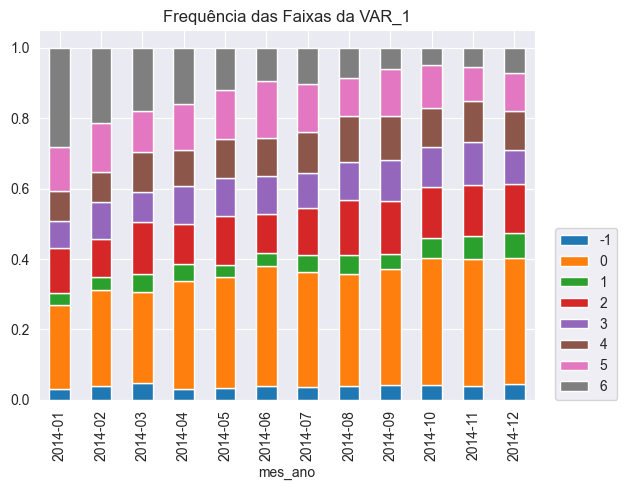

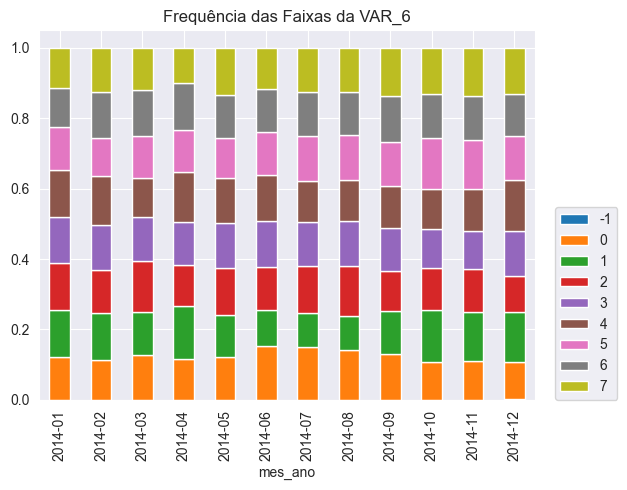

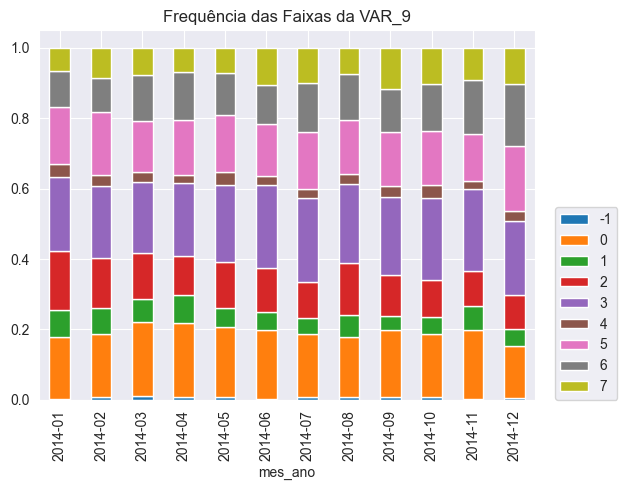

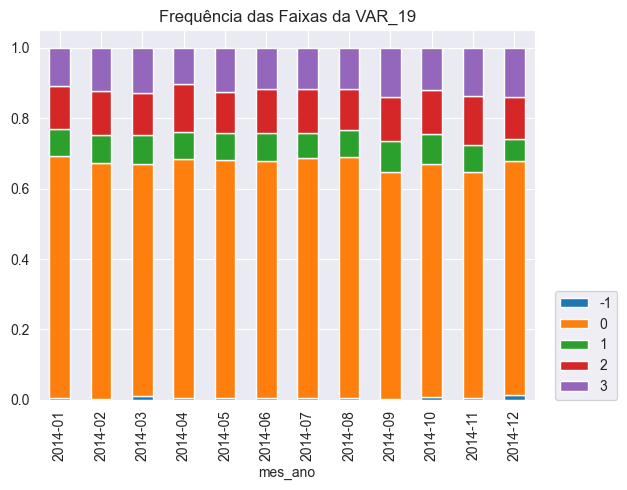

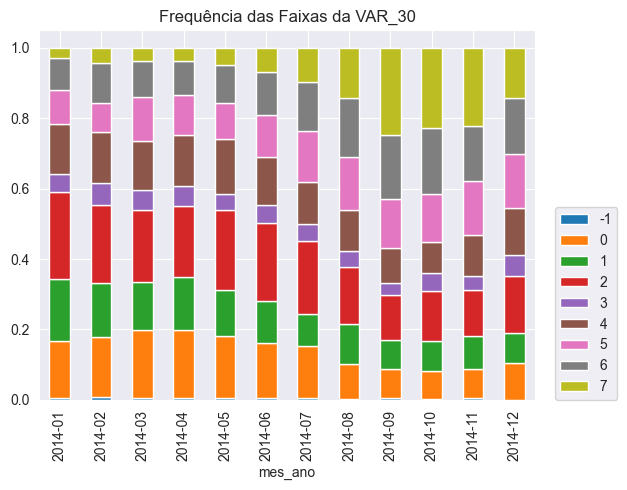

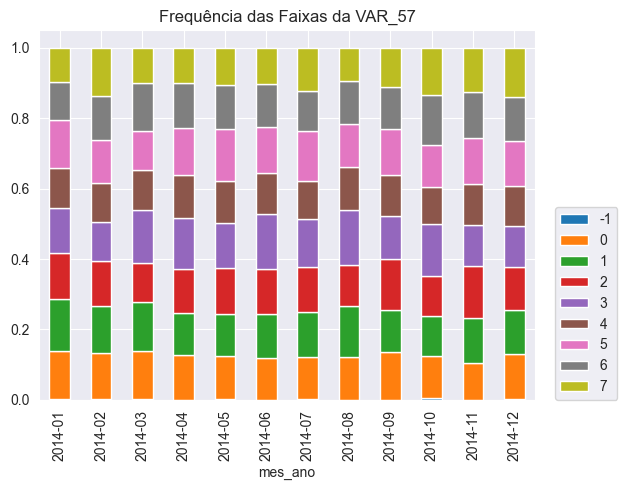

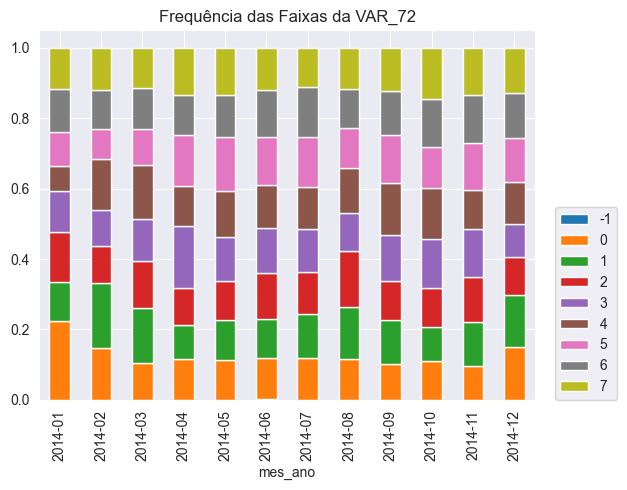

In [39]:
# Aproveitando que criamos as faixas para as variáveis categóricas, iremos entender a frequência dessas faixas com o tempo
for feat in selected_numeric_features:
    df_filter.groupby('mes_ano')[f'faixa_{feat}'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title=f'Frequência das Faixas da {feat}')
    plt.legend(loc=(1.04, 0))

### Observação 

A grande maioria das variáveis apresentou um comportamento estável no decorrer do ano de 2014. Salvo a exceção da VAR_30 e VAR_1. Apesar disso há indícios que podem ser boas variáveis preditoras para o target

In [44]:
output_path = 'data/interim/'

output_path + 'treino.parquet'

'data/interim/treino.parquet'

### 6.2 Distribuição - Features Categóricas

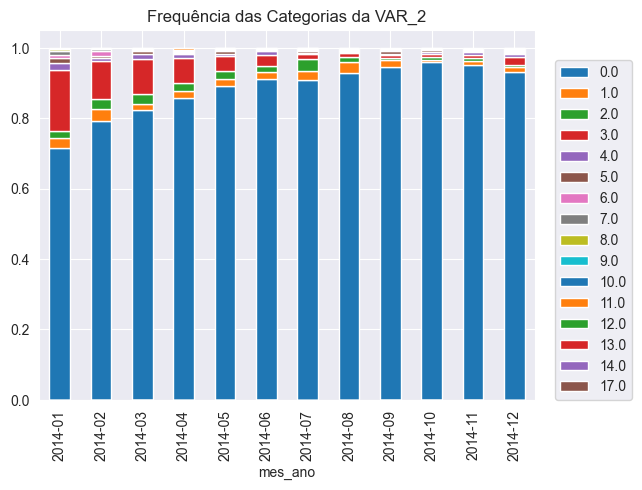

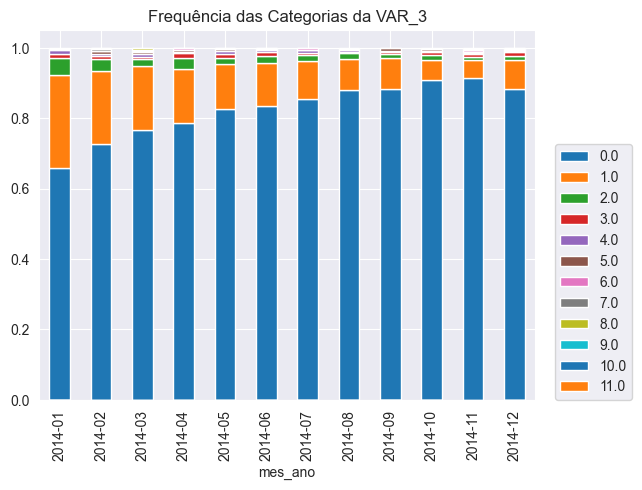

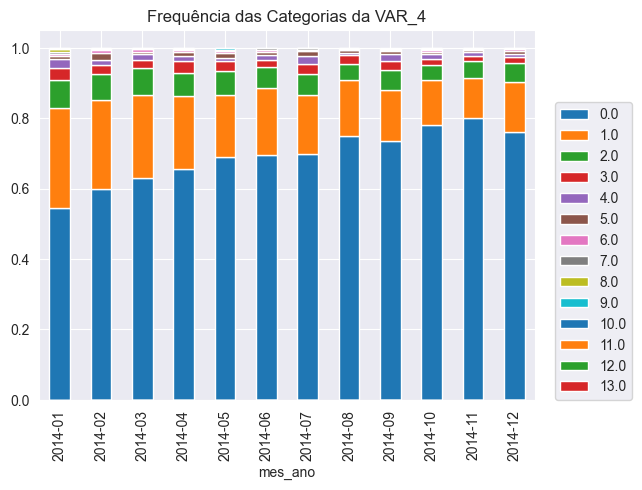

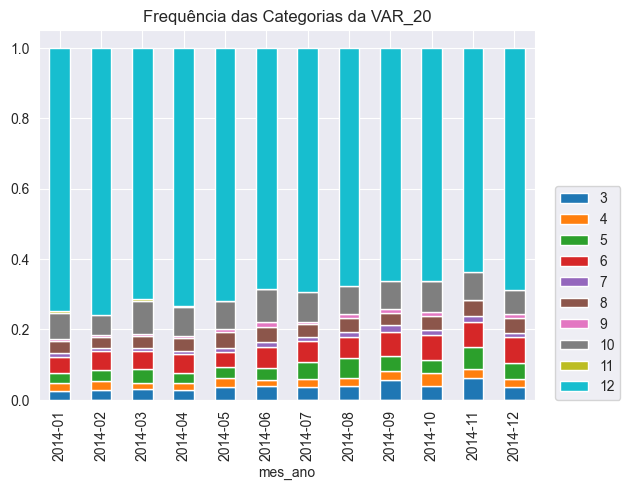

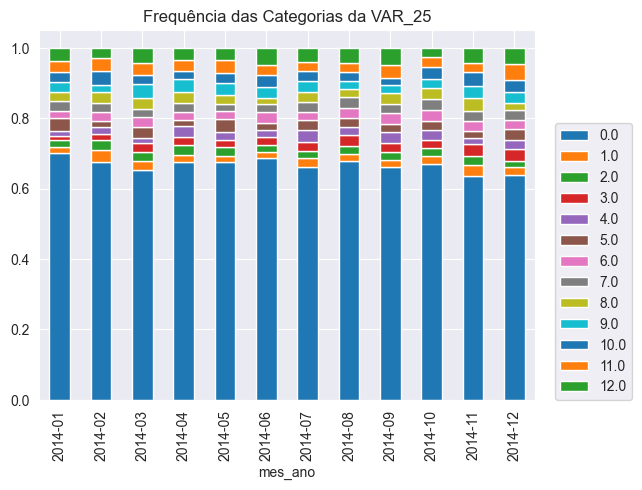

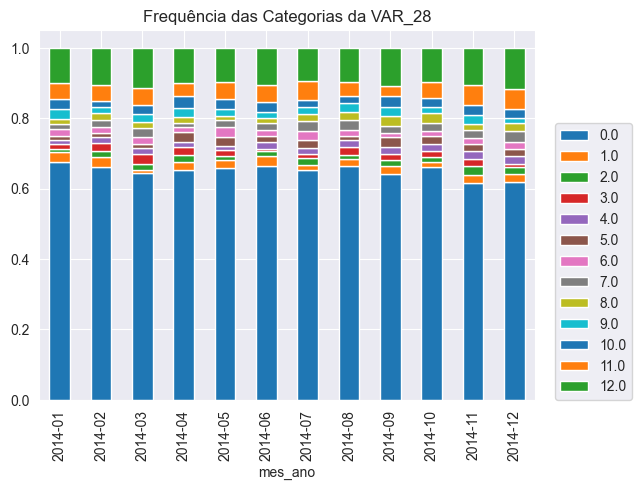

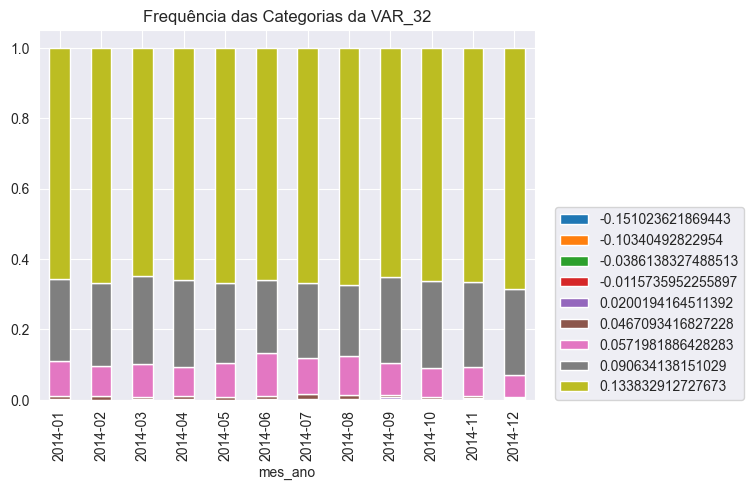

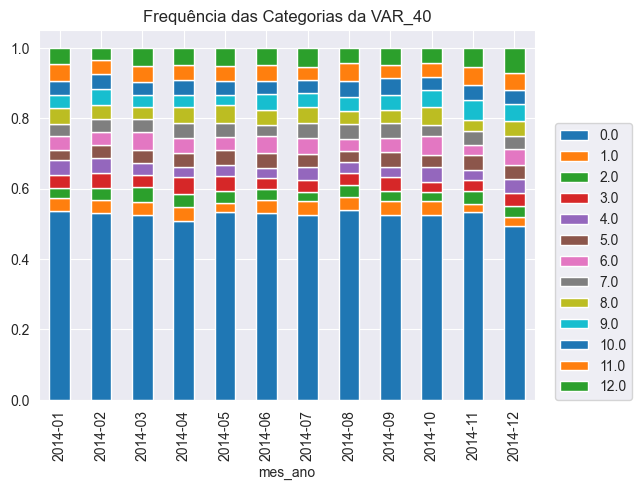

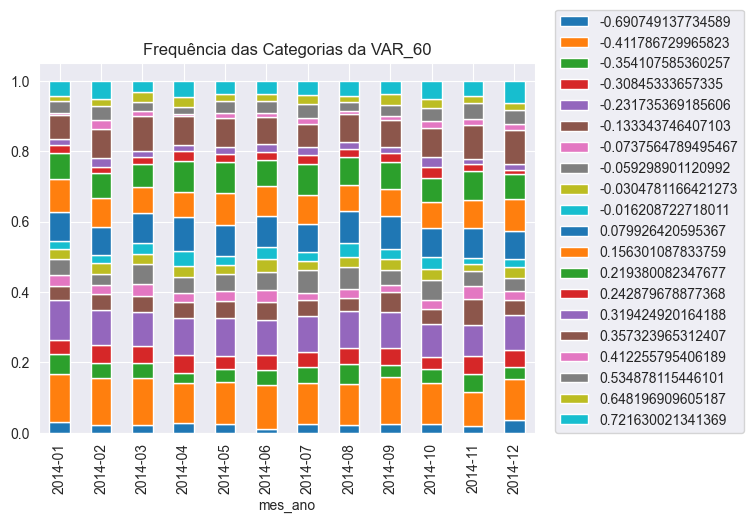

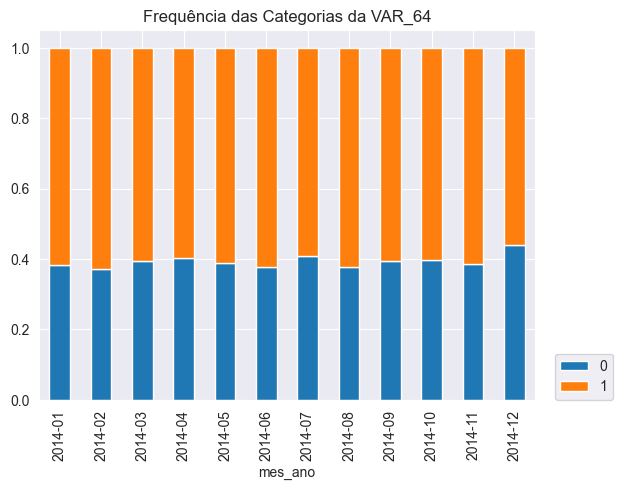

In [40]:
# Vamos repetir o mesmo passo anteriormente, porém agora para as features discretas
for feat in selected_categorical_features:
    df_filter.groupby('mes_ano')[f'{feat}'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, title=f'Frequência das Categorias da {feat}')
    plt.legend(loc=(1.04, 0))

### Observações

Vimos que temos uma grande diferença na frequência das categorias para as features VAR_2, VAR_3 e VAR_4. Isso é um grande problema, já que essa diferença se deve no final de 2014. Utilizar essas variáveis no modelo pode fazer com que ele fique descalibrado mais rapidamente, necessitando de um retreino. Sendo assim iremos optar por retirar essas features no treinamento do modelo. 

## Conclusão EDA

* Apesar do alto número de features disponíveis, menos da metade poderá ser utilizada devido a uma alta frequência de nulos. Foi feita uma filtragem das colunas com até 20% de valores nulos. A partir de 20% os valores imputados para cobrir os nulos podem começar a atrapalhar no treinamento do modelo;
* Há algumas features que, apesar de estarem como númericas, possuem comportamento de variáveis categóricas, com valores bem definidos se repetindo entre as safras. Essas colunas foram identificadas e serão tratadas como categóricas para o treinamento;
* Há variáveis com correlações muito fortes entre si. Será feito, posteriormente, uma análise de Weight of Evidence para entender quais dessas features são melhores preditoras e assim eliminar aquelas muito correlacionadas, porém preditoras fracas;
* Muitas variáveis numéricas possuem uma cauda muito extensa para a direita. Para um modelo com comportamento linear isso pode ser um problema, sendo assim testaremos modelos que sejam baseados em árvores. Além disso é visível a necessidade de tratar os outliers nessas features;
* Conseguimos identificar variáveis com um bom ordenamento para o target proposto. Como forma de conseguirmos features estáveis e identificar quais as melhores variáveis preditoras, iremos realizar uma análise de Weight of Evidence, que irá complementar a EDA e já servir como Feature Engineering.
* Apesar de ter um comportamento parecido com as features VAR_2, VAR_3 e VAR_4, a VAR_1 teve uma mudança na diminuição de uma faixa por conta do crescimento das outras faixas. É possível notar que ela também se estabiliza até o final de 2014. Vamos entender se é possível criar algum grupo que torne ela mais estaável, caso contrário poderá ser descatada do modelo

Variáveis escolhidas para a análise de WoE foram: VAR_1, VAR_6, VAR_9, VAR_19, VAR_57, VAR_72, VAR_20, VAR_25, VAR_28, VAR_32, VAR_40, VAR_60, VAR_64